# **Importation des bibliothèques utiles**

In [357]:
import time
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import pairwise_logrank_test

# **Chargement et description**

In [358]:
#chargement
data = pd.read_excel("Donnnées_Projet_M2SID2023_2024.xlsx")
#apperçu (5 premieres lignes par défaut)
data.head()

IDENTIFICATION Unnamed: 1                       DELAIS (en Heure)  \
0            AGE       SEXE  Premiers Signe - Admission à l'hopital   
1             34      Homme                                      23   
2             55      Homme                                      41   
3             60      Homme                                      28   
4             65      Homme                                      17   

                                          Unnamed: 3               ANTECEDENT  \
0   Admission à l'hopital - Prise en charge medicale  Hypertension Arterielle   
1                                                  5                      OUI   
2                                                 12                      OUI   
3                                                 19                      OUI   
4                                                 15                      OUI   

  Unnamed: 5    Unnamed: 6    CLINIQUE         Unnamed: 8 Unnamed: 9  \
0    Diabete  Cardiopathie  hémiplégie  Paralysie faciale    Aphasie   
1        NON           NON         OUI                NON        NON   
2        OUI           NON         OUI                OUI        OUI   
3        NON           NON         OUI                OUI        OUI   
4        OUI           NON         OUI                OUI        NON   

   Unnamed: 10     SIGNE DE GRAVITE               Unnamed: 12   Traitement  \
0  Hémiparésie  Engagement Cerebral  Inondation Ventriculaire          NaN   
1          OUI                  OUI                       OUI  Thrombolyse   
2          OUI                  OUI                       OUI    Chirurgie   
3          OUI                  OUI                       OUI  Thrombolyse   
4          OUI                  NON                       OUI    Chirurgie   

                                        SUIVI Unnamed: 15  
0  Temps de Suivi après traitement (en jours)   Evolution  
1                                          79       Deces  
2                                          34       Deces  
3                                          64       Deces  
4                                          62       Deces

In [359]:
# Utiliser la première ligne comme noms des colonnes
data.columns = data.iloc[0]  # Redéfinit les colonnes avec la première ligne
data = data.iloc[1:].reset_index(drop=True)  # Supprime la première ligne et réinitialise l'index


In [360]:
data.head()

0 AGE   SEXE Premiers Signe - Admission à l'hopital  \
0  34  Homme                                     23   
1  55  Homme                                     41   
2  60  Homme                                     28   
3  65  Homme                                     17   
4  65  Homme                                     17   

0  Admission à l'hopital - Prise en charge medicale Hypertension Arterielle  \
0                                                 5                     OUI   
1                                                12                     OUI   
2                                                19                     OUI   
3                                                15                     OUI   
4                                                 6                     NON   

0 Diabete Cardiopathie hémiplégie Paralysie faciale Aphasie Hémiparésie  \
0     NON          NON        OUI               NON     NON         OUI   
1     OUI          NON        OUI               OUI     OUI         OUI   
2     NON          NON        OUI               OUI     OUI         OUI   
3     OUI          NON        OUI               OUI     NON         OUI   
4     NON          NON        OUI               OUI     OUI         OUI   

0 Engagement Cerebral Inondation Ventriculaire          NaN  \
0                 OUI                      OUI  Thrombolyse   
1                 OUI                      OUI    Chirurgie   
2                 OUI                      OUI  Thrombolyse   
3                 NON                      OUI    Chirurgie   
4                 OUI                      OUI  Thrombolyse   

0 Temps de Suivi après traitement (en jours) Evolution  
0                                         79     Deces  
1                                         34     Deces  
2                                         64     Deces  
3                                         62     Deces  
4                                         12     Deces

In [361]:
data.columns.values[13] = "Traitement"


In [362]:
data.head()

0 AGE   SEXE Premiers Signe - Admission à l'hopital  \
0  34  Homme                                     23   
1  55  Homme                                     41   
2  60  Homme                                     28   
3  65  Homme                                     17   
4  65  Homme                                     17   

0  Admission à l'hopital - Prise en charge medicale Hypertension Arterielle  \
0                                                 5                     OUI   
1                                                12                     OUI   
2                                                19                     OUI   
3                                                15                     OUI   
4                                                 6                     NON   

0 Diabete Cardiopathie hémiplégie Paralysie faciale Aphasie Hémiparésie  \
0     NON          NON        OUI               NON     NON         OUI   
1     OUI          NON        OUI               OUI     OUI         OUI   
2     NON          NON        OUI               OUI     OUI         OUI   
3     OUI          NON        OUI               OUI     NON         OUI   
4     NON          NON        OUI               OUI     OUI         OUI   

0 Engagement Cerebral Inondation Ventriculaire   Traitement  \
0                 OUI                      OUI  Thrombolyse   
1                 OUI                      OUI    Chirurgie   
2                 OUI                      OUI  Thrombolyse   
3                 NON                      OUI    Chirurgie   
4                 OUI                      OUI  Thrombolyse   

0 Temps de Suivi après traitement (en jours) Evolution  
0                                         79     Deces  
1                                         34     Deces  
2                                         64     Deces  
3                                         62     Deces  
4                                         12     Deces

In [363]:
#renommage de colonnes de la base
data.columns = ['id_age', 'id_sexe', 'delais_1_signe_adm_hop', 'delais_adm_hop_prise_charge', 'antecedent_HTA', 'antecedent_diabete', 'antecedent_cardiopathie',
                'clinique_hémiplégie', 'clinique_Paralysie_faciale', 'clinique_Aphasie', 'clinique_Hémiparésie','SV_Engagement_Cerebral', 'SV_inondation_Ventriculaire', 'Traitement', 'Suivi_tempsdeSuiviaprèstraitement', 'Suivi_Evolution']
#apperçu 
data.head()

id_age id_sexe delais_1_signe_adm_hop delais_adm_hop_prise_charge  \
0     34   Homme                     23                           5   
1     55   Homme                     41                          12   
2     60   Homme                     28                          19   
3     65   Homme                     17                          15   
4     65   Homme                     17                           6   

  antecedent_HTA antecedent_diabete antecedent_cardiopathie  \
0            OUI                NON                     NON   
1            OUI                OUI                     NON   
2            OUI                NON                     NON   
3            OUI                OUI                     NON   
4            NON                NON                     NON   

  clinique_hémiplégie clinique_Paralysie_faciale clinique_Aphasie  \
0                 OUI                        NON              NON   
1                 OUI                        OUI              OUI   
2                 OUI                        OUI              OUI   
3                 OUI                        OUI              NON   
4                 OUI                        OUI              OUI   

  clinique_Hémiparésie SV_Engagement_Cerebral SV_inondation_Ventriculaire  \
0                  OUI                    OUI                         OUI   
1                  OUI                    OUI                         OUI   
2                  OUI                    OUI                         OUI   
3                  OUI                    NON                         OUI   
4                  OUI                    OUI                         OUI   

    Traitement Suivi_tempsdeSuiviaprèstraitement Suivi_Evolution  
0  Thrombolyse                                79           Deces  
1    Chirurgie                                34           Deces  
2  Thrombolyse                                64           Deces  
3    Chirurgie                                62           Deces  
4  Thrombolyse                                12           Deces

In [364]:
#dimensions de la base
print("Nombre de lignes :", data.shape[0])
print("Nombre de colonnes :", data.shape[1])

Nombre de lignes : 1053
Nombre de colonnes : 16


In [365]:
#type de variables de la base
data.dtypes

id_age                               object
id_sexe                              object
delais_1_signe_adm_hop               object
delais_adm_hop_prise_charge          object
antecedent_HTA                       object
antecedent_diabete                   object
antecedent_cardiopathie              object
clinique_hémiplégie                  object
clinique_Paralysie_faciale           object
clinique_Aphasie                     object
clinique_Hémiparésie                 object
SV_Engagement_Cerebral               object
SV_inondation_Ventriculaire          object
Traitement                           object
Suivi_tempsdeSuiviaprèstraitement    object
Suivi_Evolution                      object
dtype: object

In [366]:
#Analyse des données manquantes (par colonne)
data.isna().sum(axis = 0)

id_age                               0
id_sexe                              0
delais_1_signe_adm_hop               0
delais_adm_hop_prise_charge          0
antecedent_HTA                       0
antecedent_diabete                   0
antecedent_cardiopathie              0
clinique_hémiplégie                  0
clinique_Paralysie_faciale           0
clinique_Aphasie                     0
clinique_Hémiparésie                 0
SV_Engagement_Cerebral               0
SV_inondation_Ventriculaire          0
Traitement                           0
Suivi_tempsdeSuiviaprèstraitement    0
Suivi_Evolution                      0
dtype: int64

<Axes: >

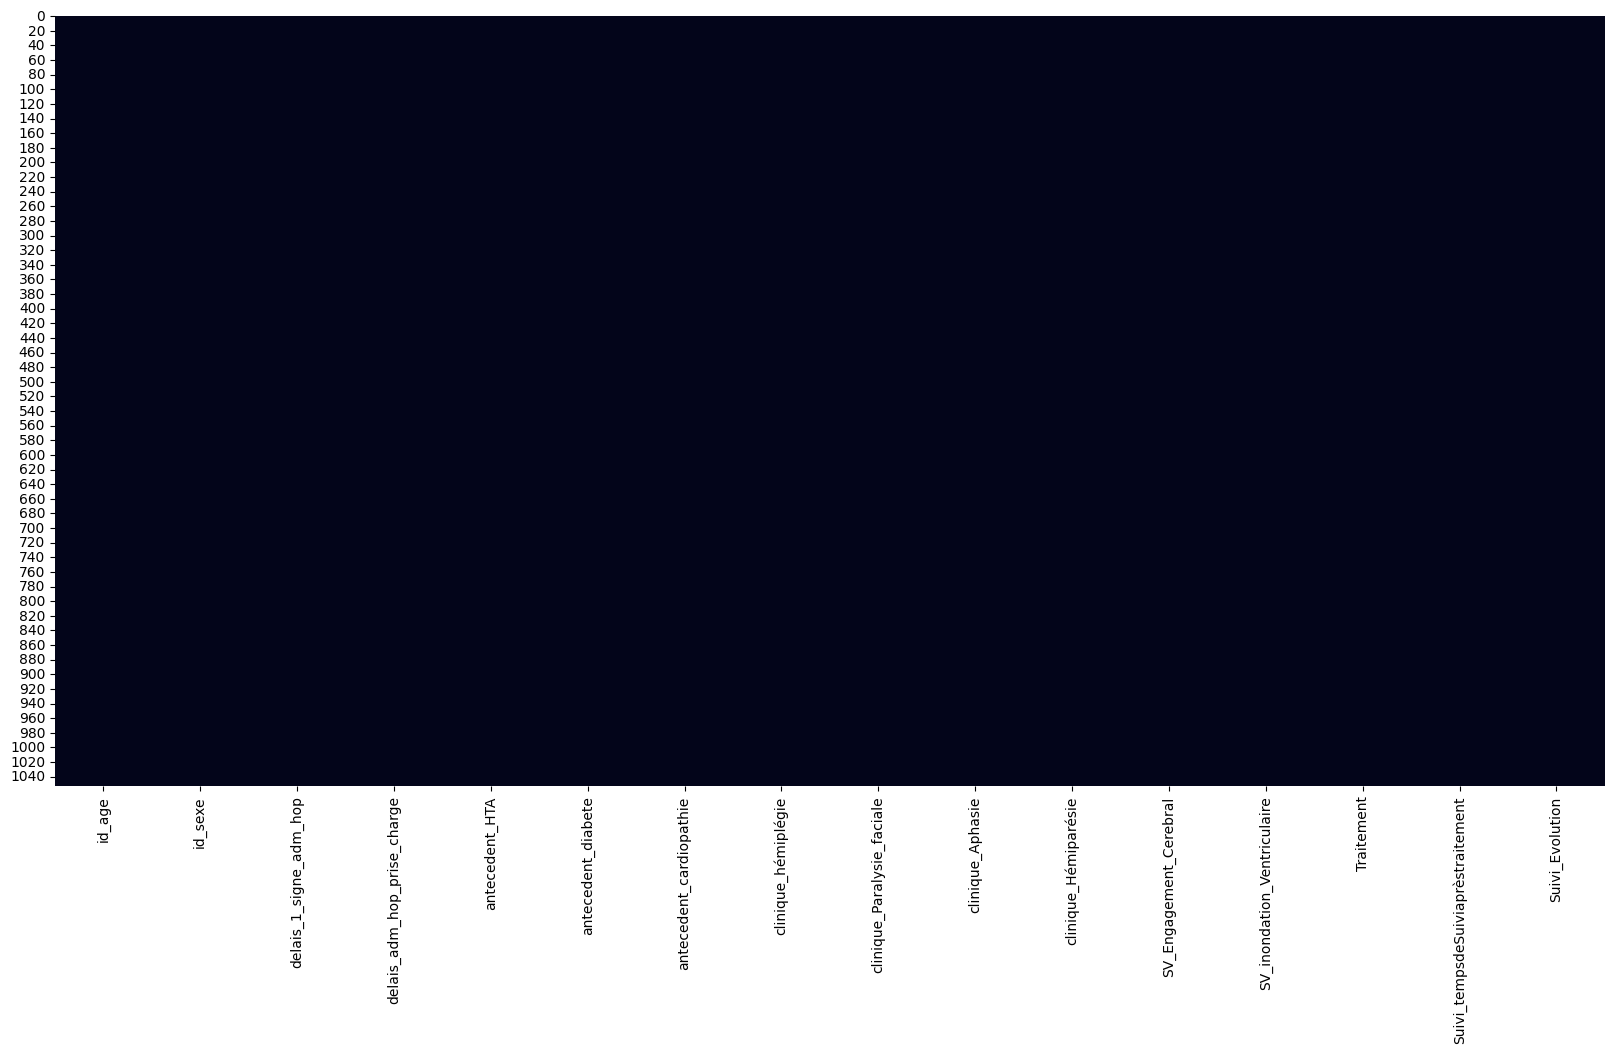

In [368]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

In [369]:
#nombre de modalités/valeurs uniques de chaque variable
data.nunique()

id_age                                52
id_sexe                                2
delais_1_signe_adm_hop                95
delais_adm_hop_prise_charge           20
antecedent_HTA                         2
antecedent_diabete                     2
antecedent_cardiopathie                2
clinique_hémiplégie                    2
clinique_Paralysie_faciale             2
clinique_Aphasie                       2
clinique_Hémiparésie                   2
SV_Engagement_Cerebral                 2
SV_inondation_Ventriculaire            2
Traitement                             2
Suivi_tempsdeSuiviaprèstraitement    308
Suivi_Evolution                        2
dtype: int64

In [370]:
# Conversion des colonnes numériques en types adéquats
numeric_columns = [
    "id_age", "delais_1_signe_adm_hop",
    "delais_adm_hop_prise_charge", "Suivi_tempsdeSuiviaprèstraitement"]
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [371]:
data.dtypes

id_age                                int64
id_sexe                              object
delais_1_signe_adm_hop                int64
delais_adm_hop_prise_charge           int64
antecedent_HTA                       object
antecedent_diabete                   object
antecedent_cardiopathie              object
clinique_hémiplégie                  object
clinique_Paralysie_faciale           object
clinique_Aphasie                     object
clinique_Hémiparésie                 object
SV_Engagement_Cerebral               object
SV_inondation_Ventriculaire          object
Traitement                           object
Suivi_tempsdeSuiviaprèstraitement     int64
Suivi_Evolution                      object
dtype: object

In [372]:
data['Suivi_Evolution'].value_counts(normalize=True)

Suivi_Evolution
Deces     0.65717
Vivant    0.34283
Name: proportion, dtype: float64

In [373]:
# Résumé statistique par groupe
summary_by_group = data.groupby('Suivi_Evolution').describe()
print(summary_by_group)


                id_age                                                      \
                 count       mean        std   min   25%   50%   75%   max   
Suivi_Evolution                                                              
Deces            692.0  51.187861  10.974617  17.0  45.0  50.0  57.0  81.0   
Vivant           361.0  52.783934  10.846037  17.0  45.0  52.0  60.0  81.0   

                delais_1_signe_adm_hop             ...  \
                                 count       mean  ...   
Suivi_Evolution                                    ...   
Deces                            692.0  51.765896  ...   
Vivant                           361.0   5.592798  ...   

                delais_adm_hop_prise_charge        \
                                        75%   max   
Suivi_Evolution                                     
Deces                                  17.0  20.0   
Vivant                                  5.0   6.0   

                Suivi_tempsdeSuiviaprèstraitement   

In [374]:
# Identifier les colonnes catégoriques
categorical_features = data.select_dtypes(include=['object']).columns

# Grouper les données par la variable cible 'Suivi_Evolution'
grouped = data.groupby('Suivi_Evolution')

# Calculer et afficher les proportions pour chaque catégorie
for col in categorical_features:
    print(f"Proportions pour {col} :")
    print(grouped[col].value_counts(normalize=True))
    print("\n")


Proportions pour id_sexe :
Suivi_Evolution  id_sexe
Deces            Homme      0.893064
                 Femme      0.106936
Vivant           Homme      0.839335
                 Femme      0.160665
Name: proportion, dtype: float64


Proportions pour antecedent_HTA :
Suivi_Evolution  antecedent_HTA
Deces            OUI               0.783237
                 NON               0.216763
Vivant           OUI               0.554017
                 NON               0.445983
Name: proportion, dtype: float64


Proportions pour antecedent_diabete :
Suivi_Evolution  antecedent_diabete
Deces            OUI                   0.767341
                 NON                   0.232659
Vivant           NON                   0.523546
                 OUI                   0.476454
Name: proportion, dtype: float64


Proportions pour antecedent_cardiopathie :
Suivi_Evolution  antecedent_cardiopathie
Deces            OUI                        0.566474
                 NON                        0.4335

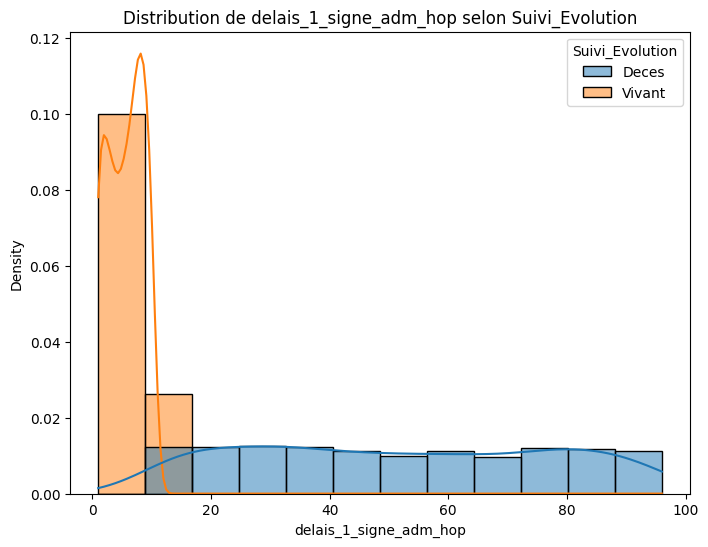

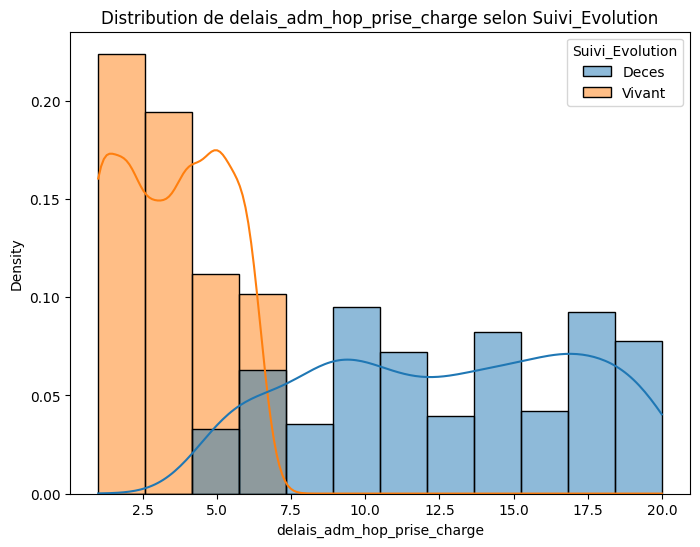

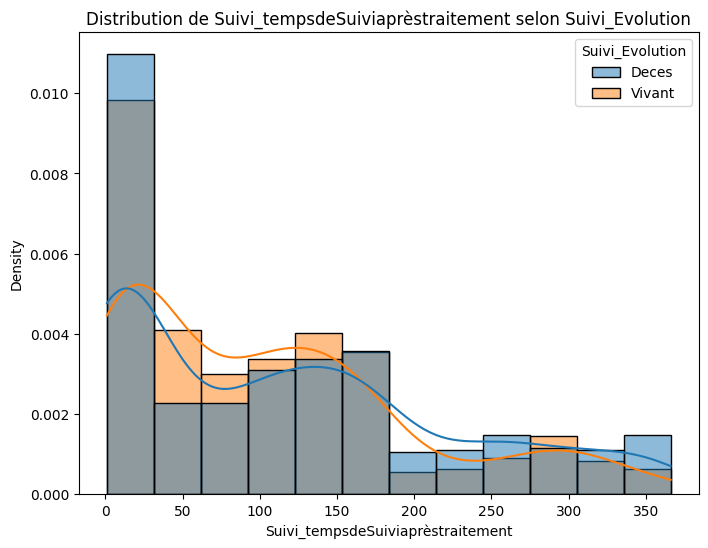

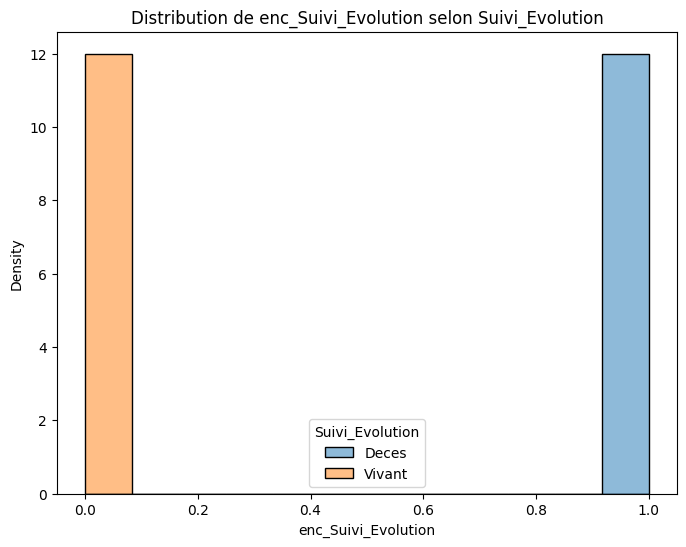

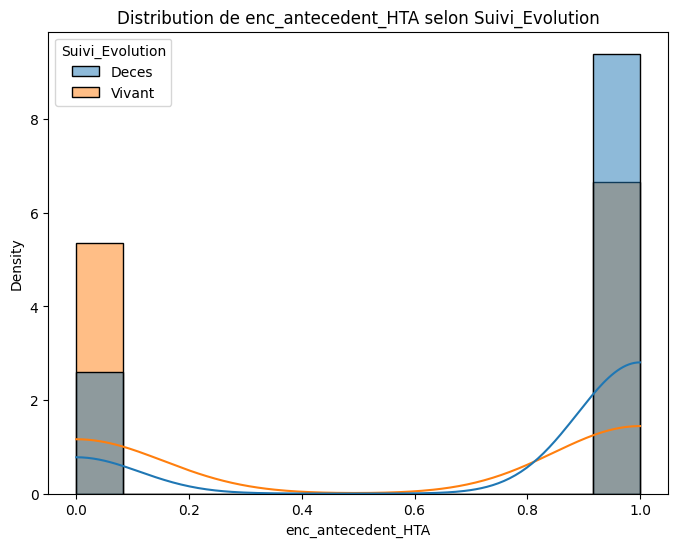

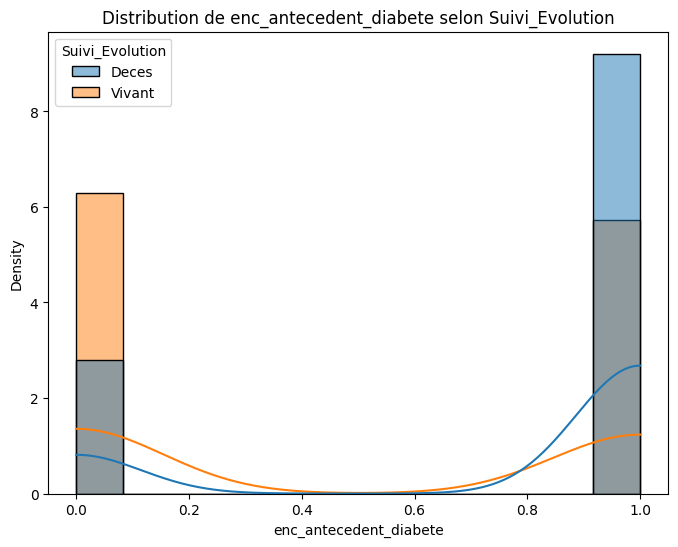

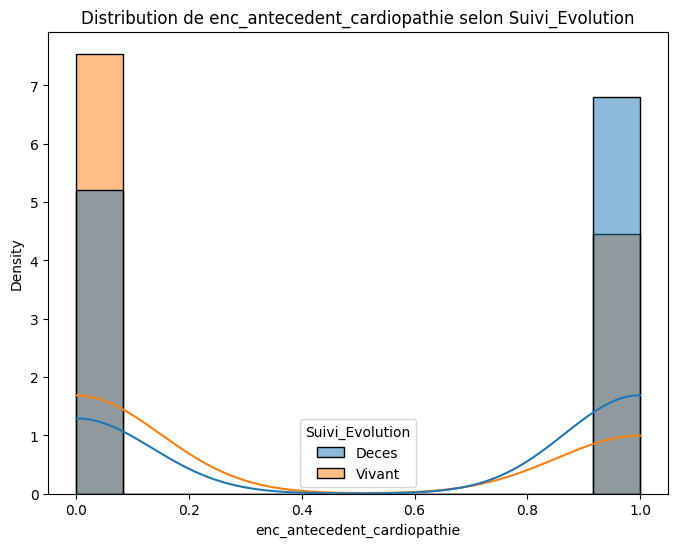

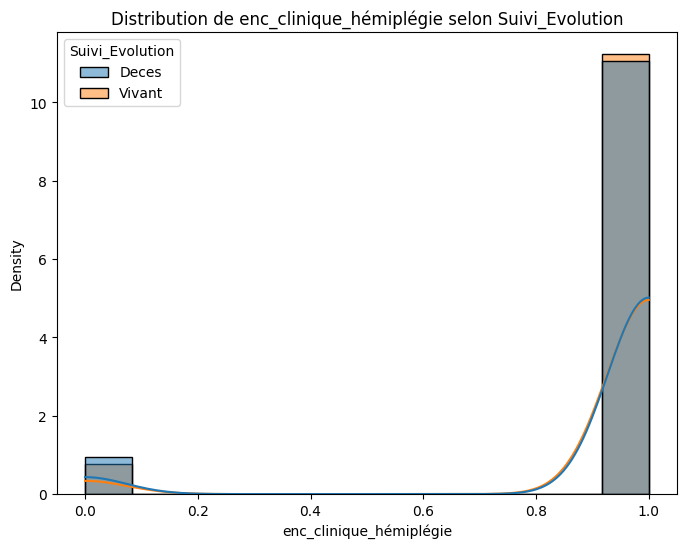

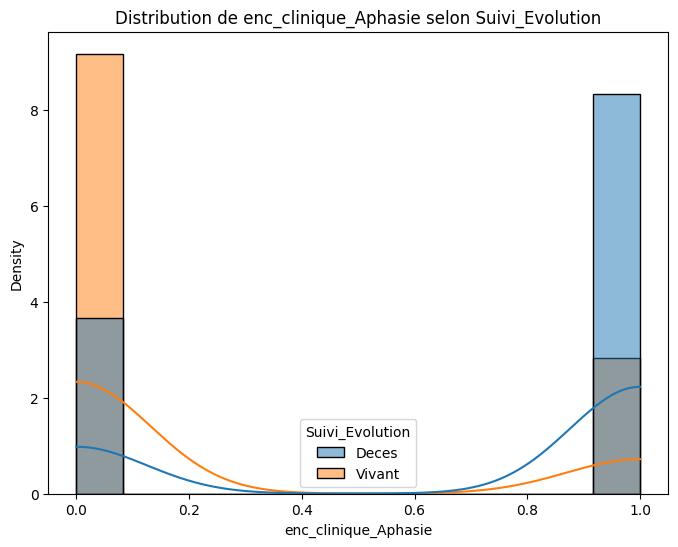

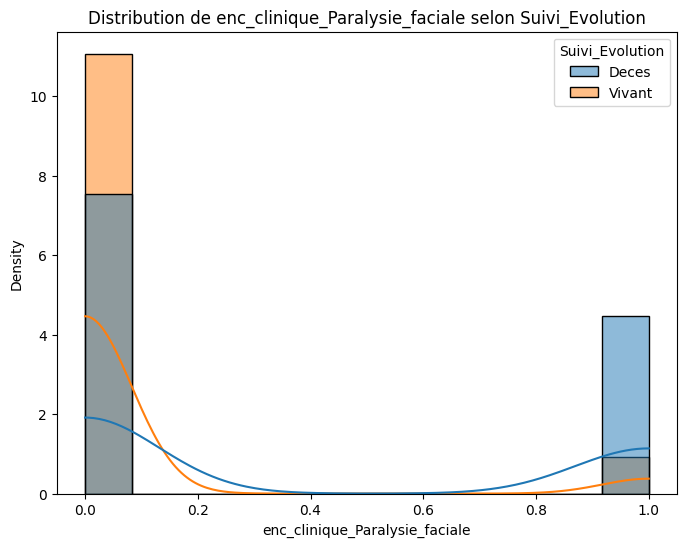

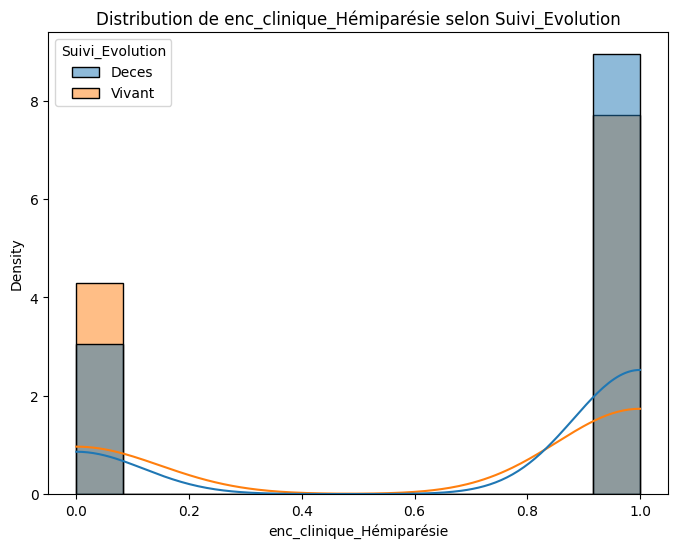

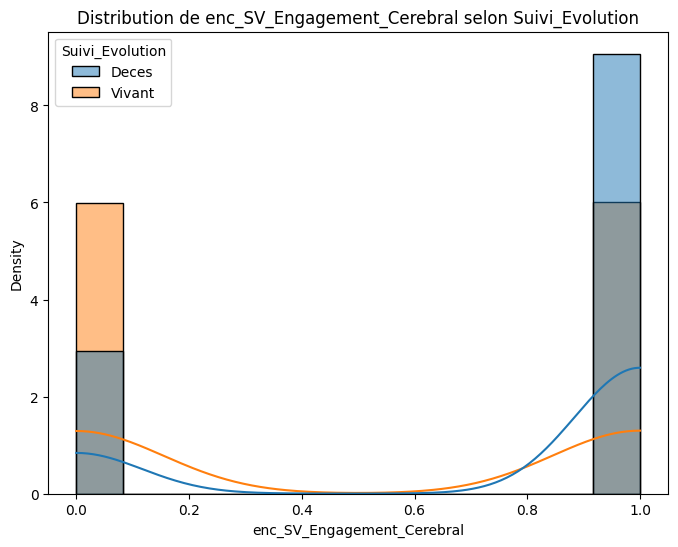

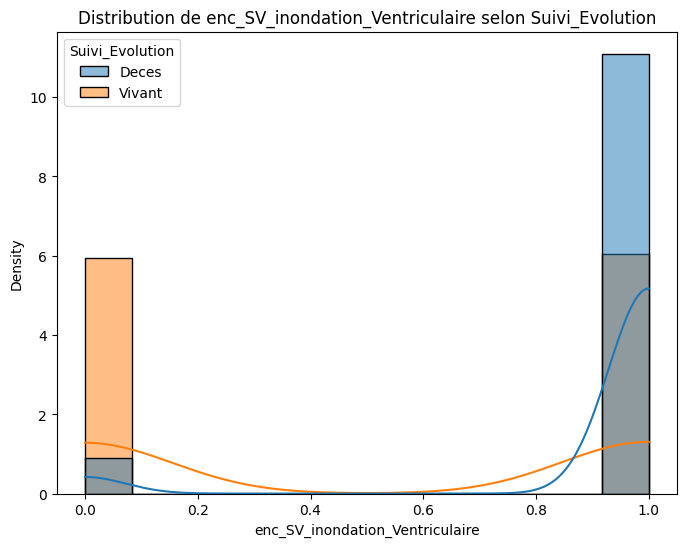

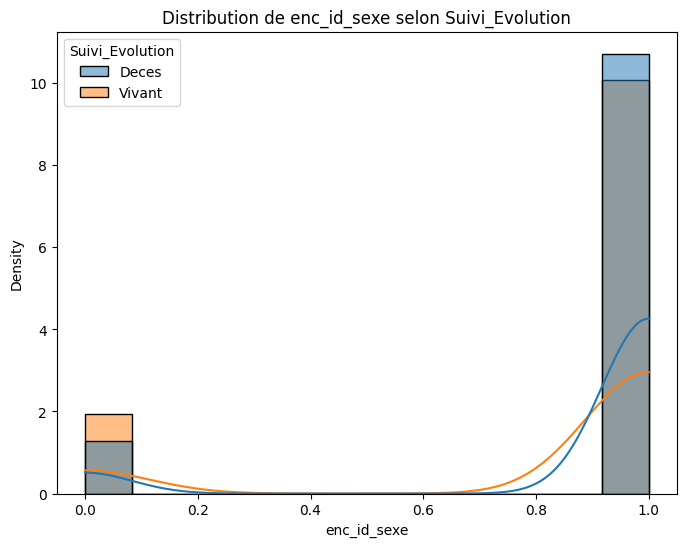

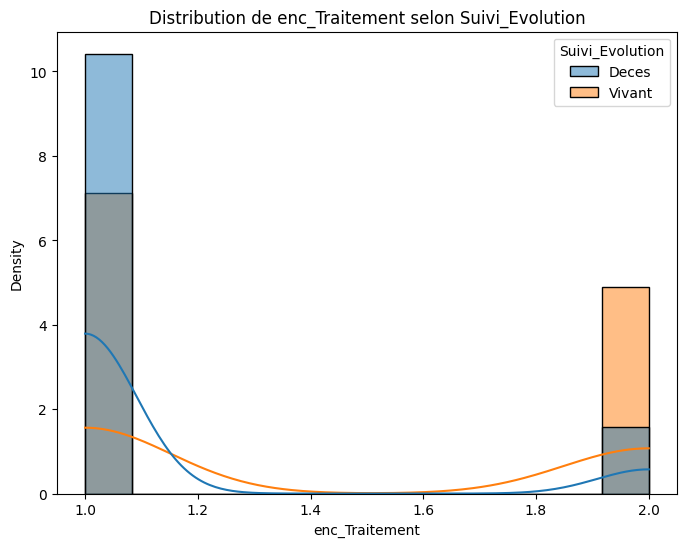

In [410]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in data.select_dtypes(include=['int']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data, x=col, hue='Suivi_Evolution', kde=True, stat="density", common_norm=False)
    plt.title(f"Distribution de {col} selon Suivi_Evolution")
    plt.show()


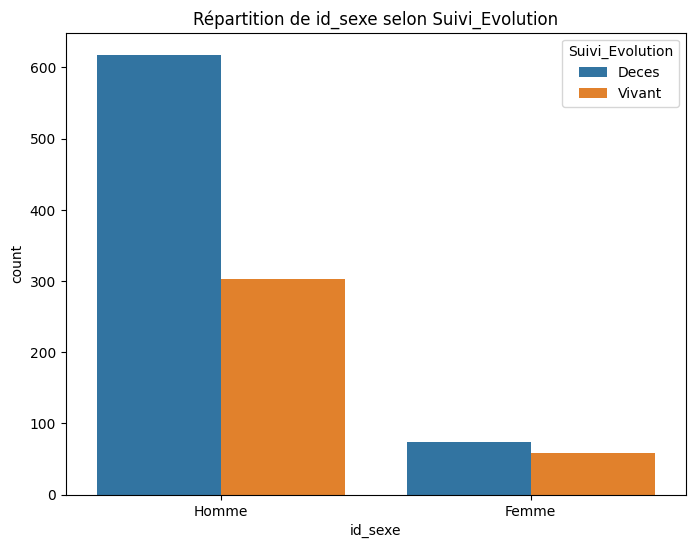

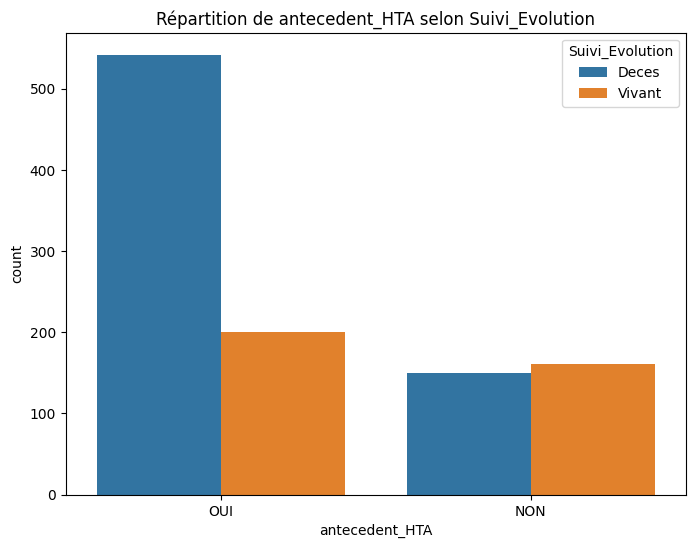

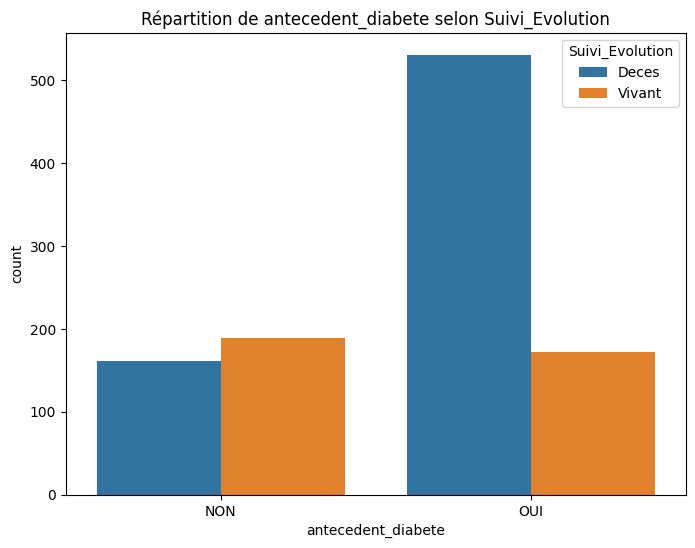

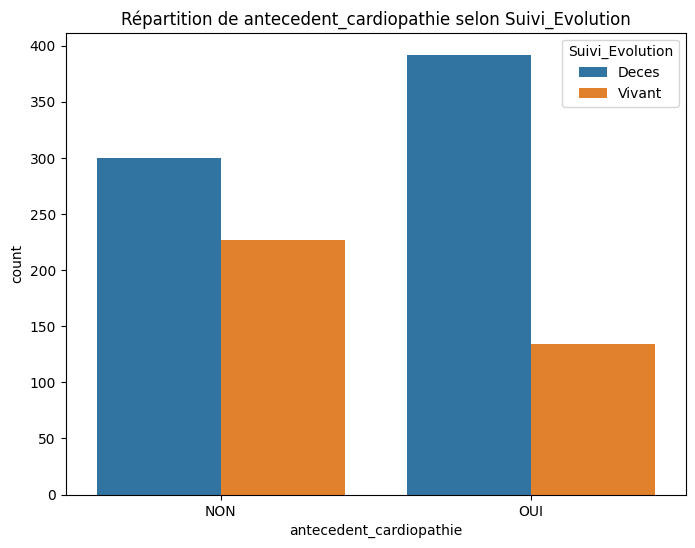

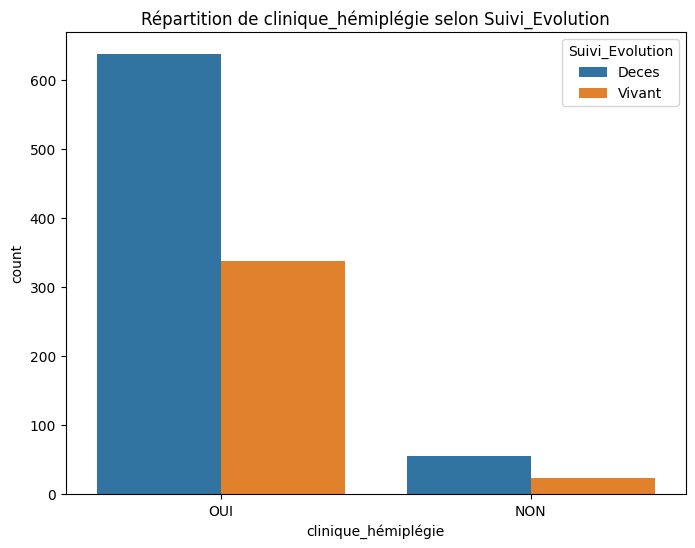

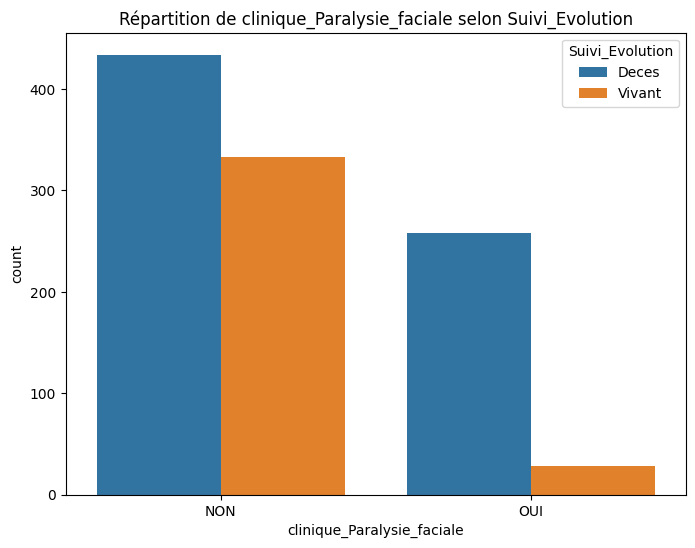

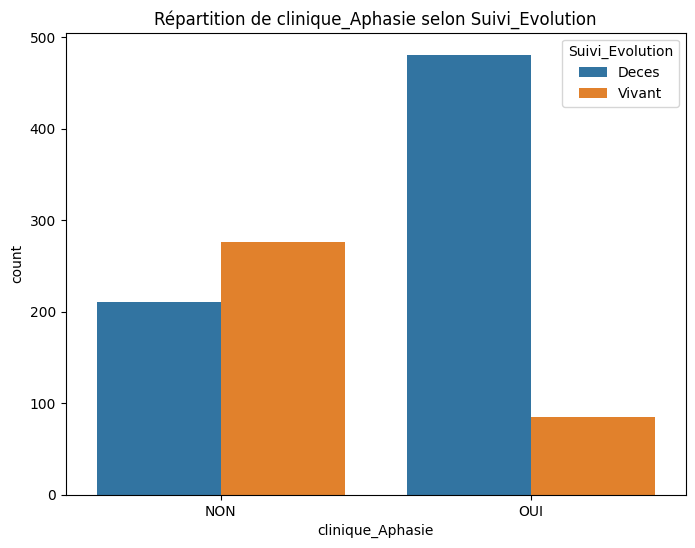

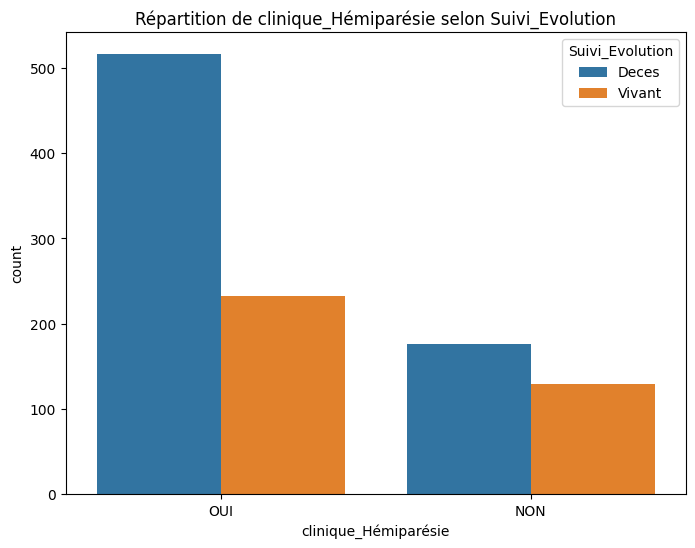

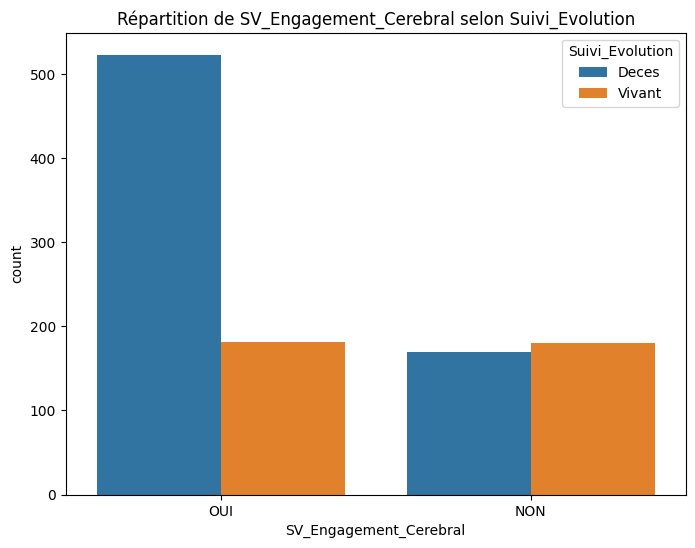

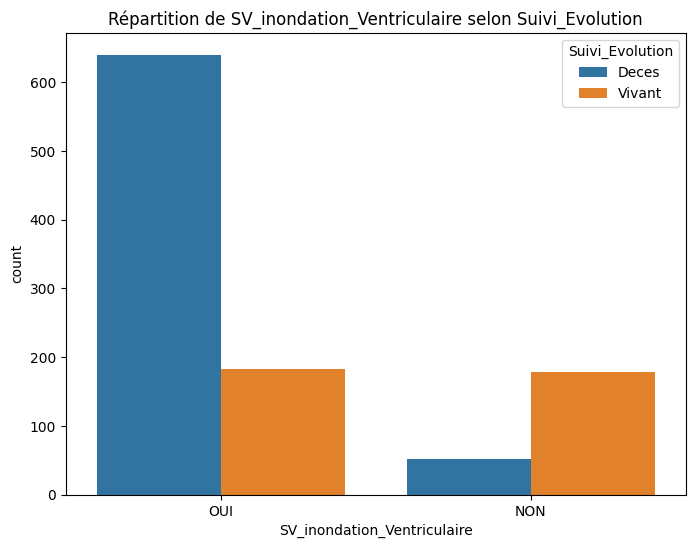

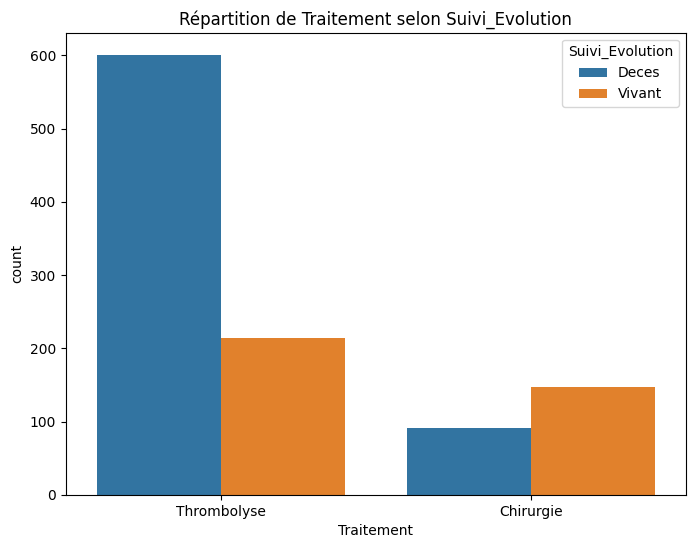

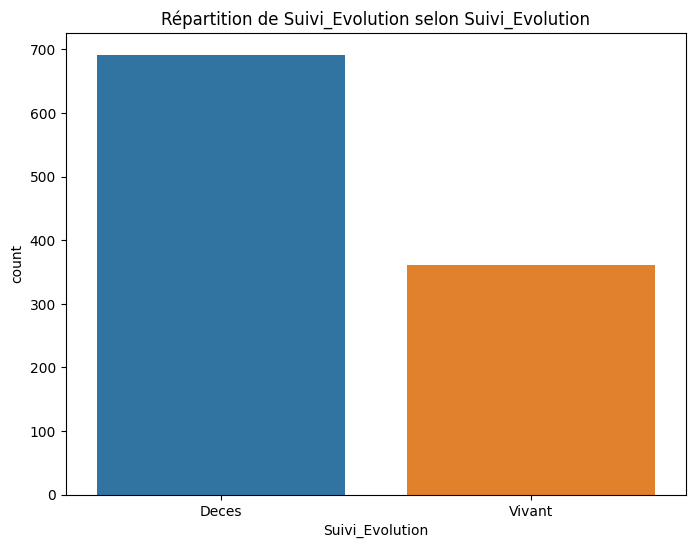

In [376]:
for col in data.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col, hue='Suivi_Evolution')
    plt.title(f"Répartition de {col} selon Suivi_Evolution")
    plt.show()

In [411]:
from scipy.stats import ttest_ind

for col in data.select_dtypes(include=['int']).columns:
    group1 = data[data['Suivi_Evolution'] == 'Deces'][col]
    group2 = data[data['Suivi_Evolution'] == 'Vivant'][col]
    stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
    print(f"{col} : p-value = {p_value}")


delais_1_signe_adm_hop : p-value = 3.531494919803794e-172
delais_adm_hop_prise_charge : p-value = 1.3100580227398646e-198
Suivi_tempsdeSuiviaprèstraitement : p-value = 0.08393564839978943
enc_Suivi_Evolution : p-value = 0.0
enc_antecedent_HTA : p-value = 4.385662905886132e-15
enc_antecedent_diabete : p-value = 2.6285934797701985e-22
enc_antecedent_cardiopathie : p-value = 1.351301068980251e-09
enc_clinique_hémiplégie : p-value = 0.3542182654694639
enc_clinique_Aphasie : p-value = 1.7566182937058519e-50
enc_clinique_Paralysie_faciale : p-value = 1.0572908740448429e-25
enc_clinique_Hémiparésie : p-value = 0.0004587727847024636
enc_SV_Engagement_Cerebral : p-value = 2.7676970350305827e-17
enc_SV_inondation_Ventriculaire : p-value = 1.6251555504938646e-62
enc_id_sexe : p-value = 0.012419827642140066
enc_Traitement : p-value = 2.3995590857631825e-25


C:\Users\sokhn\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [378]:
from scipy.stats import chi2_contingency

for col in  data.select_dtypes(include=['object']).columns:
    contingency_table = pd.crosstab(data[col], data['Suivi_Evolution'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col} : p-value = {p}")


id_sexe : p-value = 0.01634125222514021
antecedent_HTA : p-value = 1.747428258775163e-14
antecedent_diabete : p-value = 3.648964483552767e-21
antecedent_cardiopathie : p-value = 2.6686129193480557e-09
clinique_hémiplégie : p-value = 0.42174489951796823
clinique_Paralysie_faciale : p-value = 3.2488381748983015e-24
clinique_Aphasie : p-value = 2.34973696799182e-45
clinique_Hémiparésie : p-value = 0.0006122775414026124
SV_Engagement_Cerebral : p-value = 1.518822804262848e-16
SV_inondation_Ventriculaire : p-value = 9.937518285994178e-55
Traitement : p-value = 7.106801232539643e-24
Suivi_Evolution : p-value = 4.988760113829209e-230


In [379]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

Null Count
Feature                                      
id_age                                      0
id_sexe                                     0
delais_1_signe_adm_hop                      0
delais_adm_hop_prise_charge                 0
antecedent_HTA                              0
antecedent_diabete                          0
antecedent_cardiopathie                     0
clinique_hémiplégie                         0
clinique_Paralysie_faciale                  0
clinique_Aphasie                            0
clinique_Hémiparésie                        0
SV_Engagement_Cerebral                      0
SV_inondation_Ventriculaire                 0
Traitement                                  0
Suivi_tempsdeSuiviaprèstraitement           0
Suivi_Evolution                             0

In [380]:
# Résumé statistique des variables
data.describe(include="all")

id_age id_sexe  delais_1_signe_adm_hop  \
count   1053.000000    1053             1053.000000   
unique          NaN       2                     NaN   
top             NaN   Homme                     NaN   
freq            NaN     921                     NaN   
mean      51.735043     NaN               35.936372   
std       10.951808     NaN               30.256645   
min       17.000000     NaN                1.000000   
25%       45.000000     NaN                8.000000   
50%       51.000000     NaN               29.000000   
75%       60.000000     NaN               62.000000   
max       81.000000     NaN               96.000000   

        delais_adm_hop_prise_charge antecedent_HTA antecedent_diabete  \
count                   1053.000000           1053               1053   
unique                          NaN              2                  2   
top                             NaN            OUI                OUI   
freq                            NaN            742                703   
mean                       9.575499            NaN                NaN   
std                        5.814892            NaN                NaN   
min                        1.000000            NaN                NaN   
25%                        5.000000            NaN                NaN   
50%                        9.000000            NaN                NaN   
75%                       15.000000            NaN                NaN   
max                       20.000000            NaN                NaN   

       antecedent_cardiopathie clinique_hémiplégie clinique_Paralysie_faciale  \
count                     1053                1053                       1053   
unique                       2                   2                          2   
top                        NON                 OUI                        NON   
freq                       527                 975                        767   
mean                       NaN                 NaN                        NaN   
std                        NaN                 NaN                        NaN   
min                        NaN                 NaN                        NaN   
25%                        NaN                 NaN                        NaN   
50%                        NaN                 NaN                        NaN   
75%                        NaN                 NaN                        NaN   
max                        NaN                 NaN                        NaN   

       clinique_Aphasie clinique_Hémiparésie SV_Engagement_Cerebral  \
count              1053                 1053                   1053   
unique                2                    2                      2   
top                 OUI                  OUI                    OUI   
freq                566                  748                    704   
mean                NaN                  NaN                    NaN   
std                 NaN                  NaN                    NaN   
min                 NaN                  NaN                    NaN   
25%                 NaN                  NaN                    NaN   
50%                 NaN                  NaN                    NaN   
75%                 NaN                  NaN                    NaN   
max                 NaN                  NaN                    NaN   

       SV_inondation_Ventriculaire   Traitement  \
count                         1053         1053   
unique                           2            2   
top                            OUI  Thrombolyse   
freq                           822          815   
mean                           NaN          NaN   
std                            NaN          NaN   
min                            NaN          NaN   
25%                            NaN          NaN   
50%                            NaN          NaN   
75%                            NaN          NaN   
max                            NaN          NaN   

        Suivi_tempsdeSuiviaprèstrait

C:\Users\sokhn\AppData\Local\Temp\ipykernel_7596\1404823660.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\sokhn\AppData\Local\Temp\ipykernel_7596\1404823660.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\sokhn\AppData\Local\Temp\ipykernel_7596\1

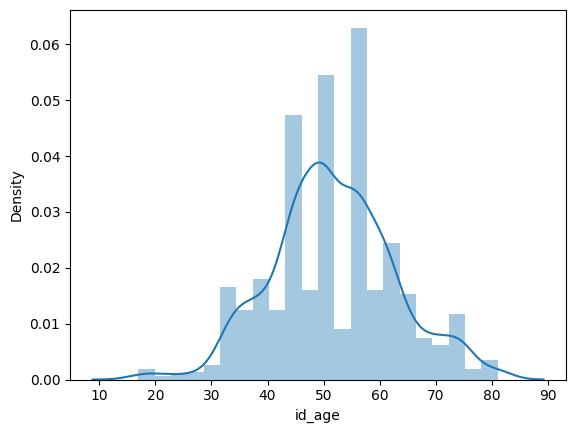

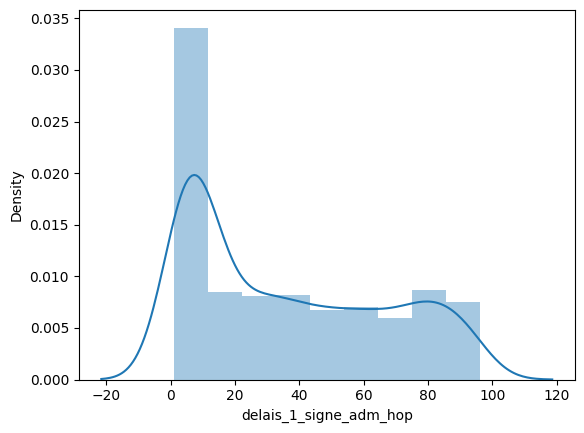

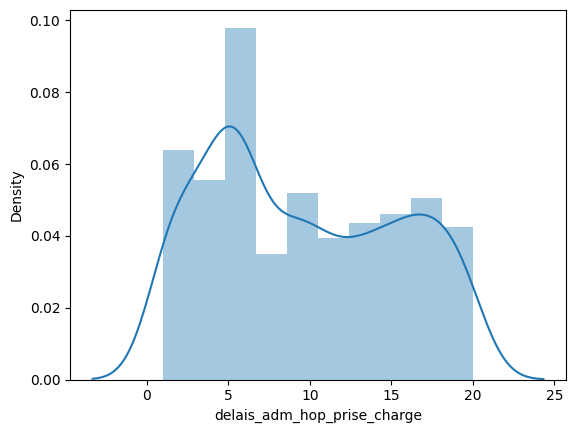

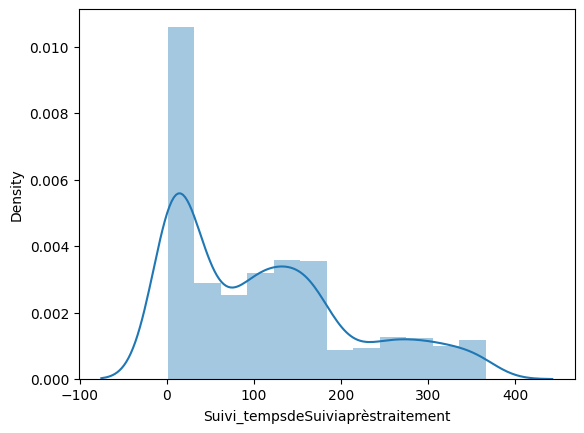

In [381]:
for col in data.select_dtypes('int'):
    plt.figure()
    sns.distplot(data[col])

In [382]:
data['id_age'].value_counts()

id_age
55    115
50    103
45     74
57     71
61     66
48     49
60     47
46     45
34     45
51     42
43     37
40     33
74     32
37     29
44     26
64     25
49     22
52     21
39     20
65     18
69     18
70     13
81      9
35      8
31      7
56      7
76      6
32      6
53      6
71      5
62      5
66      4
75      4
63      4
17      3
68      3
19      3
58      2
28      2
26      2
80      2
38      2
67      2
24      2
42      1
36      1
54      1
30      1
23      1
20      1
21      1
72      1
Name: count, dtype: int64

In [383]:
data['id_sexe'].value_counts()

id_sexe
Homme    921
Femme    132
Name: count, dtype: int64

In [384]:
for col in data.select_dtypes('object'):
    print(f'{col :-<50} {data[col].unique()}')

id_sexe------------------------------------------- ['Homme' 'Femme']
antecedent_HTA------------------------------------ ['OUI' 'NON']
antecedent_diabete-------------------------------- ['NON' 'OUI']
antecedent_cardiopathie--------------------------- ['NON' 'OUI']
clinique_hémiplégie------------------------------- ['OUI' 'NON']
clinique_Paralysie_faciale------------------------ ['NON' 'OUI']
clinique_Aphasie---------------------------------- ['NON' 'OUI']
clinique_Hémiparésie------------------------------ ['OUI' 'NON']
SV_Engagement_Cerebral---------------------------- ['OUI' 'NON']
SV_inondation_Ventriculaire----------------------- ['OUI' 'NON']
Traitement---------------------------------------- ['Thrombolyse' 'Chirurgie']
Suivi_Evolution----------------------------------- ['Deces' 'Vivant']


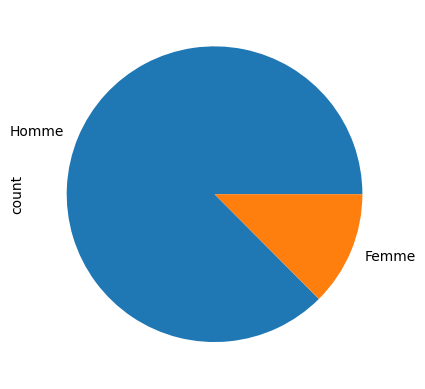

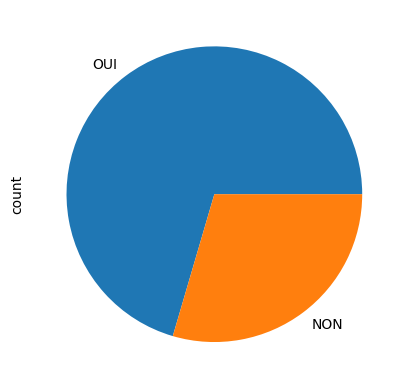

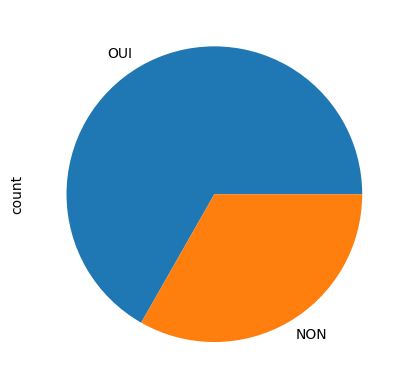

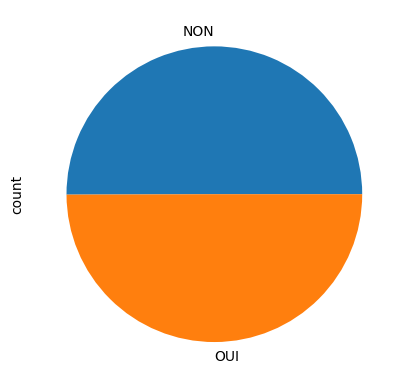

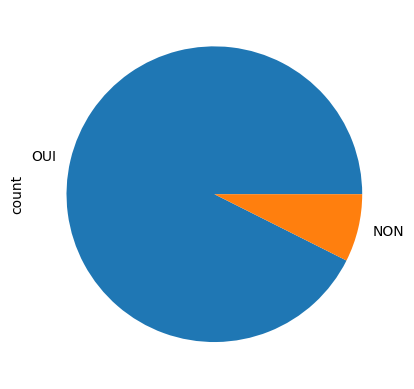

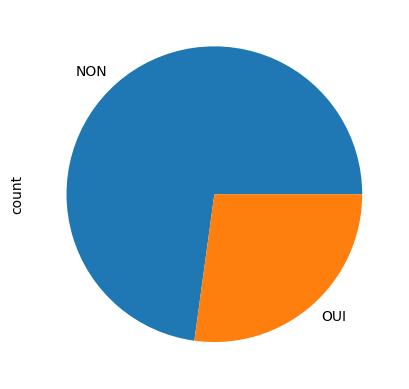

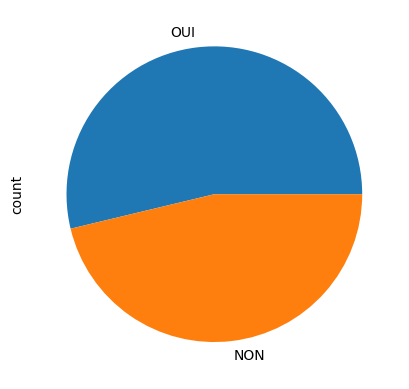

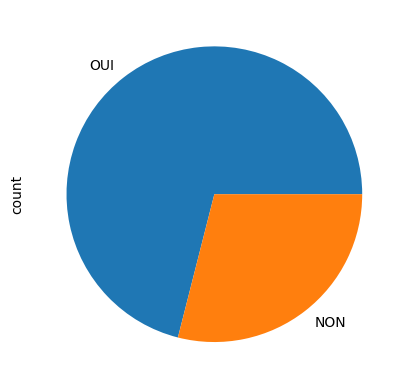

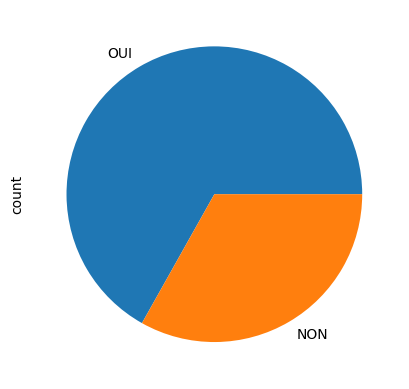

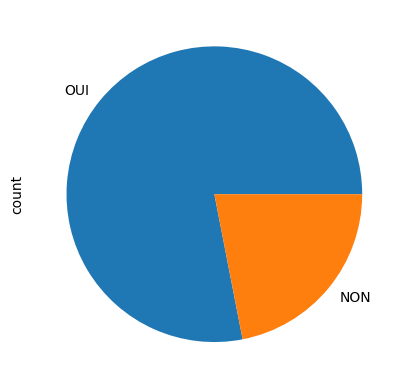

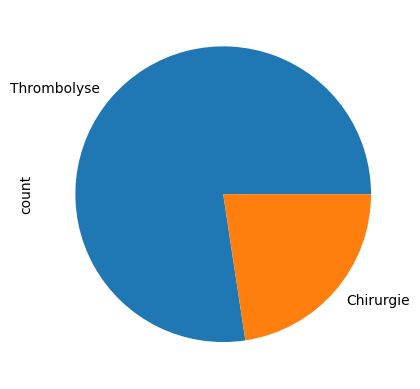

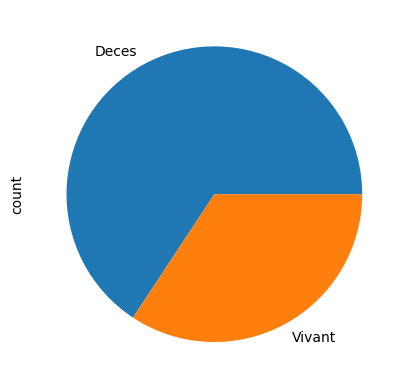

In [385]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()
    

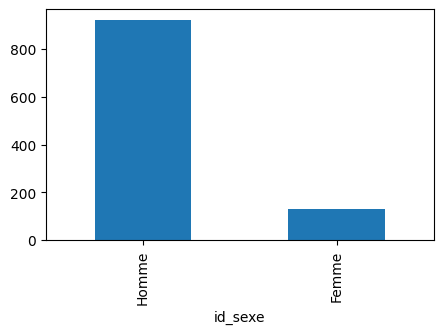

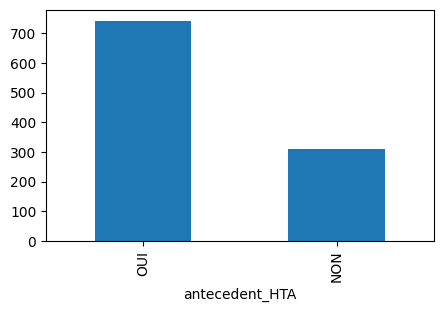

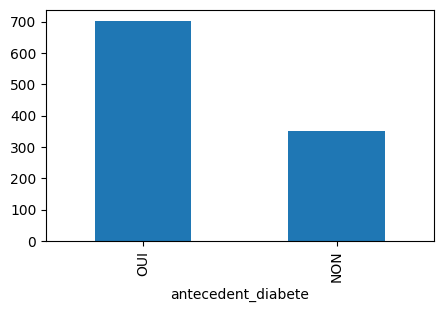

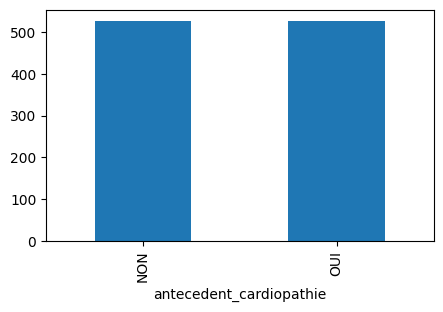

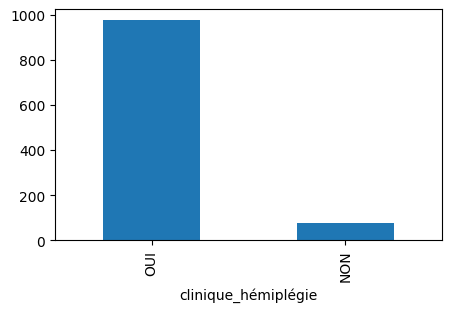

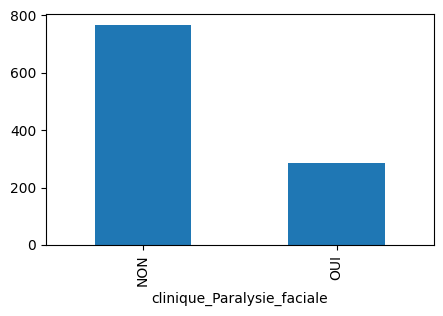

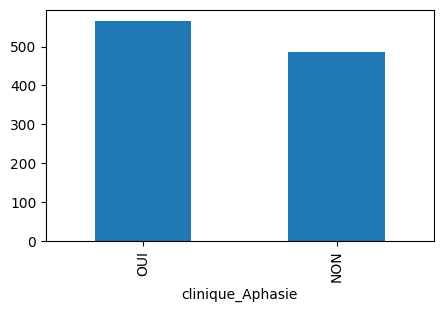

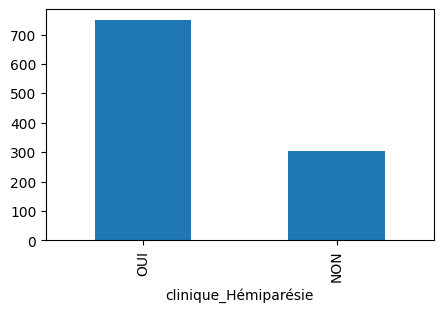

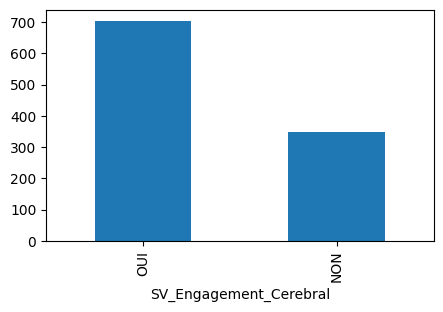

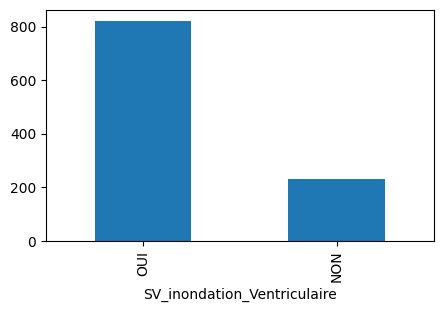

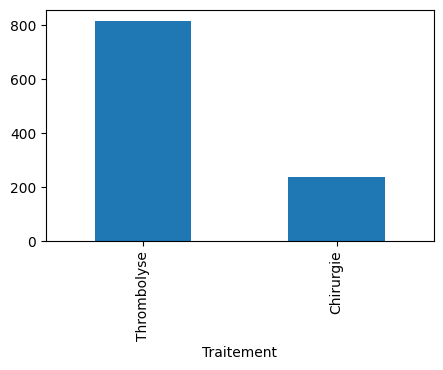

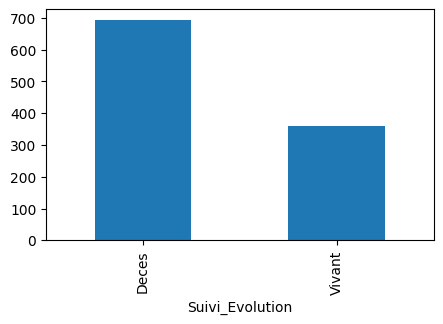

In [386]:
for var in data.select_dtypes('object'):
    plt.figure(figsize = (5 , 3))
    data[var].value_counts().plot.bar()
    plt.show()

<Figure size 1000x600 with 0 Axes>

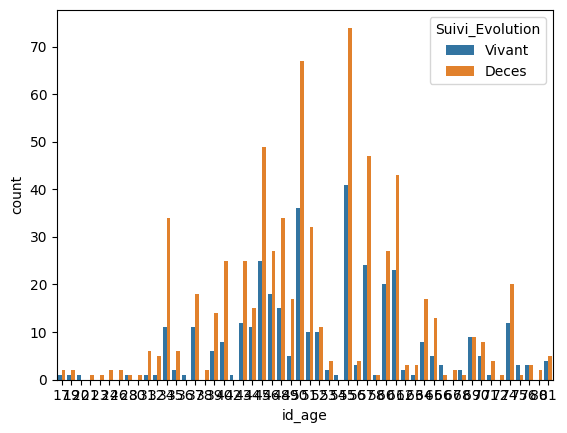

<Figure size 1000x600 with 0 Axes>

In [387]:
sns.countplot(x='id_age', hue='Suivi_Evolution', data=data)
plt.figure(figsize = (10,6))

In [388]:
pd.crosstab(data['Suivi_Evolution'], data['Traitement'])

Traitement       Chirurgie  Thrombolyse
Suivi_Evolution                        
Deces                   91          601
Vivant                 147          214

In [389]:
pd.crosstab(data['Suivi_Evolution'], data['id_sexe'])

id_sexe          Femme  Homme
Suivi_Evolution              
Deces               74    618
Vivant              58    303

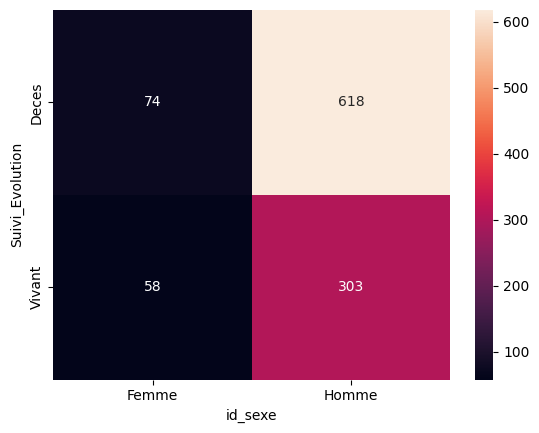

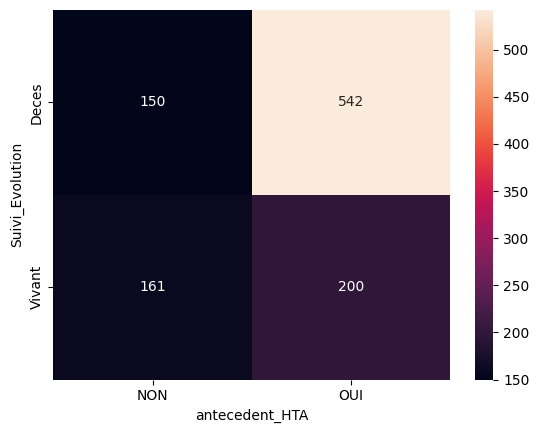

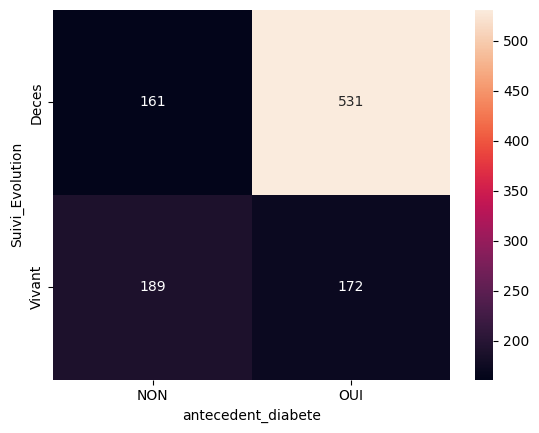

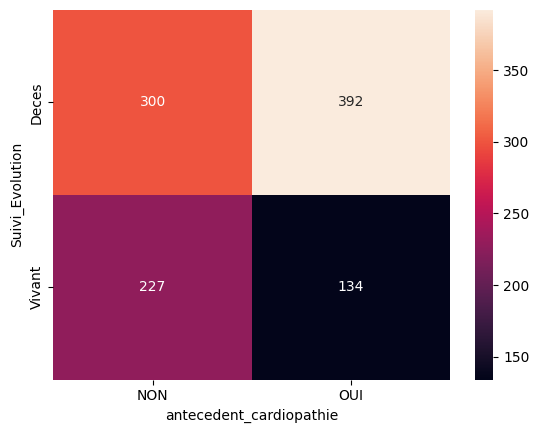

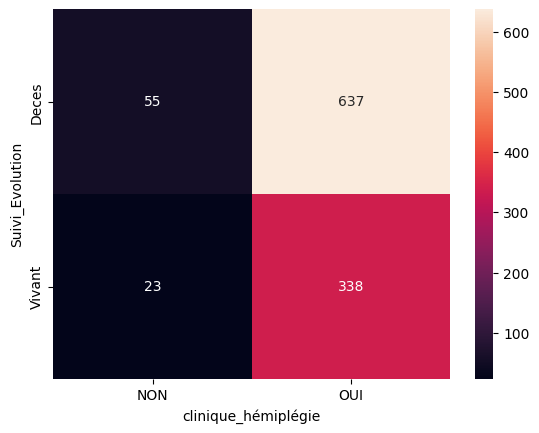

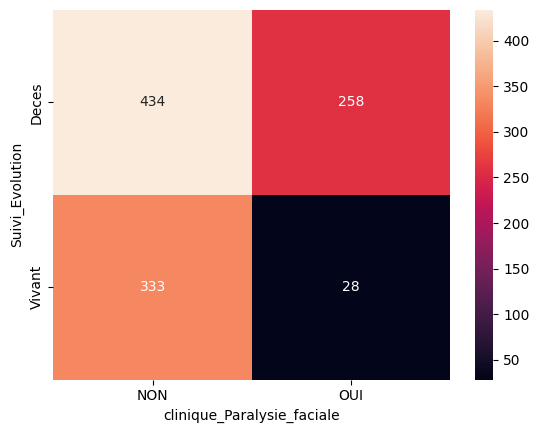

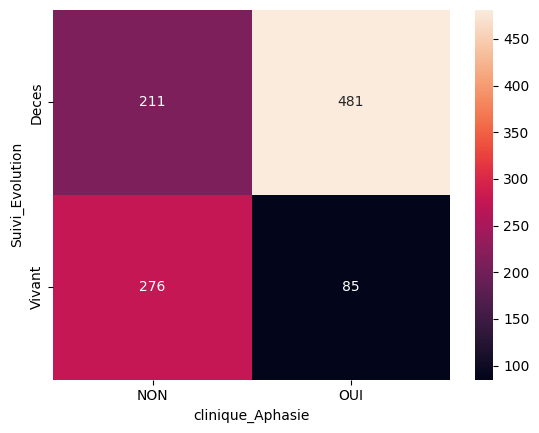

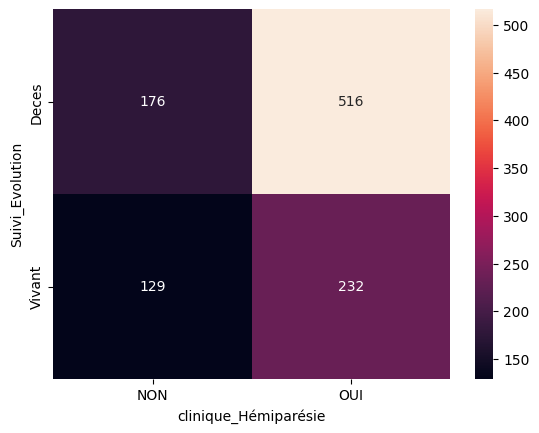

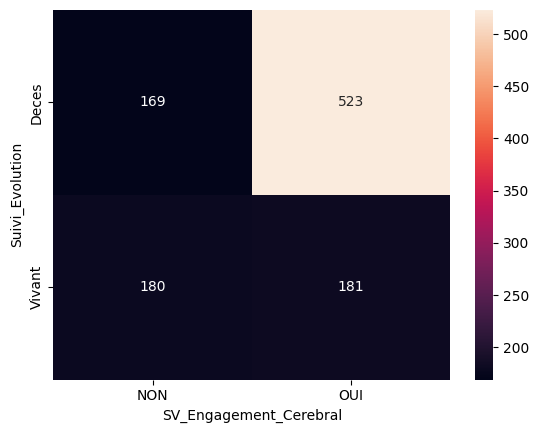

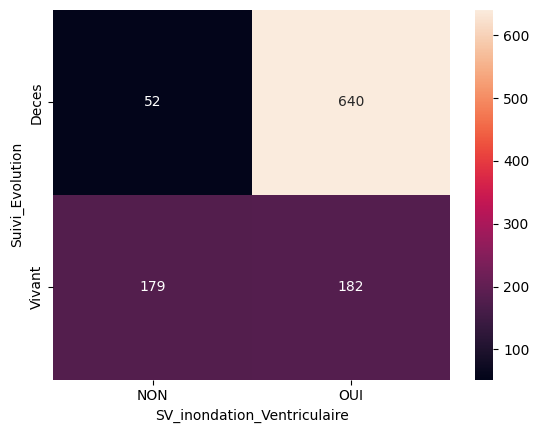

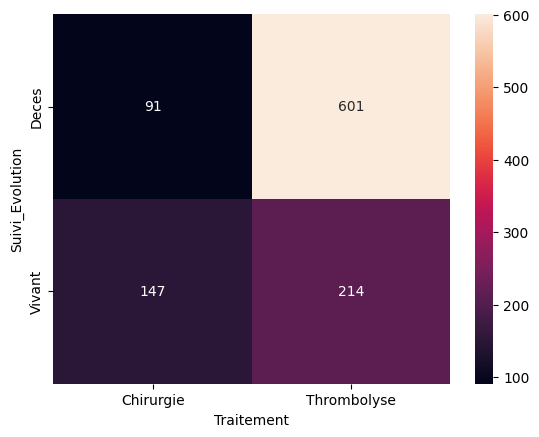

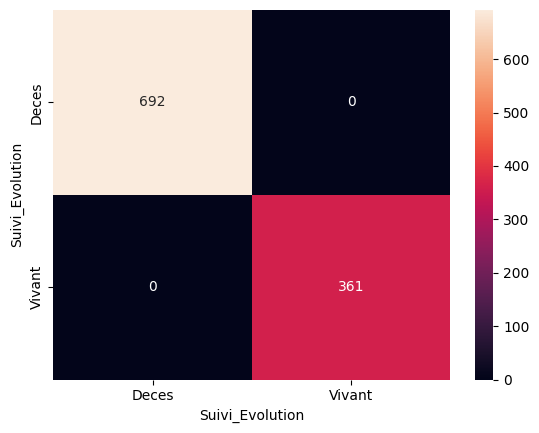

In [390]:
for col in data.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(data['Suivi_Evolution'], data[col]), annot=True, fmt='d')

In [391]:
def test_khi2(data, var1, var2):
    table = pd.crosstab(data[var1],data[var2])
    resultats = chi2_contingency(table)
    print("{} et {}".format(var1,var2))
    print("Statistique de test : {}".format(resultats[0]))
    print("   Degré de liberté : {}".format(resultats[2]))
    print("            P_value : {}".format(resultats[1]))
    if ( resultats[1] < 0.05):
        print("{} et {} ne sont pas indépendantes".format(var1,var2))
    else:
        print("{} et {} sont indépendantes".format(var1,var2))
    print("\n \n")
    pass

In [392]:
#Test Statistique du Khi-deux
from scipy.stats import chi2_contingency
liste = []
for var1 in data.select_dtypes('object'):
    liste.append(var1)
    for var2 in [var for var in data.select_dtypes('object') if var not in liste ]:
        test_khi2(data,var1,var2)

id_sexe et antecedent_HTA
Statistique de test : 1.252449059124165
   Degré de liberté : 1
            P_value : 0.2630852352780855
id_sexe et antecedent_HTA sont indépendantes

 

id_sexe et antecedent_diabete
Statistique de test : 0.0
   Degré de liberté : 1
            P_value : 1.0
id_sexe et antecedent_diabete sont indépendantes

 

id_sexe et antecedent_cardiopathie
Statistique de test : 11.938134240853726
   Degré de liberté : 1
            P_value : 0.0005499652817054862
id_sexe et antecedent_cardiopathie ne sont pas indépendantes

 

id_sexe et clinique_hémiplégie
Statistique de test : 2.8160812111341422
   Degré de liberté : 1
            P_value : 0.09332399629672786
id_sexe et clinique_hémiplégie sont indépendantes

 

id_sexe et clinique_Paralysie_faciale
Statistique de test : 8.155256238613148
   Degré de liberté : 1
            P_value : 0.0042936533019553745
id_sexe et clinique_Paralysie_faciale ne sont pas indépendantes

 

id_sexe et clinique_Aphasie
Statistique de tes

In [393]:
def test_anova(data, var1, var2):
    results = statsmodels.formula.api.ols('{} ~ {}'.format(var1,var2), data = data).fit()
    table = statsmodels.api.stats.anova_lm(results)
    print("{} et {}".format(var1,var2))
    print("Statistique de test : {}".format(table['F'][0]))
    print("   Degré de liberté : {}".format(table['df'][0]))
    print("            P_value : {}".format(table['PR(>F)'][0]))
    if ( table['PR(>F)'][0] < 0.05):
        print("{} et {} ne sont pas indépendantes".format(var1,var2))
    print("\n \n")
    pass

In [394]:
variables= ['id_age', 'delais_1_signe_adm_hop', 'delais_adm_hop_prise_charge', 'Suivi_tempsdeSuiviaprèstraitement']

from scipy.stats import chi2_contingency
liste = []
for var1 in data.select_dtypes('object') :
    liste.append(var1)
    for var2 in [var for var in variables if var not in liste ]:
        test_khi2(data,var1,var2)

id_sexe et id_age
Statistique de test : 121.7238253475825
   Degré de liberté : 51
            P_value : 1.0264084723316539e-07
id_sexe et id_age ne sont pas indépendantes

 

id_sexe et delais_1_signe_adm_hop
Statistique de test : 92.78674302220709
   Degré de liberté : 94
            P_value : 0.516021500440245
id_sexe et delais_1_signe_adm_hop sont indépendantes

 

id_sexe et delais_adm_hop_prise_charge
Statistique de test : 20.585027549147057
   Degré de liberté : 19
            P_value : 0.36017626870800235
id_sexe et delais_adm_hop_prise_charge sont indépendantes

 

id_sexe et Suivi_tempsdeSuiviaprèstraitement
Statistique de test : 478.45372533910654
   Degré de liberté : 307
            P_value : 1.2483345925060766e-09
id_sexe et Suivi_tempsdeSuiviaprèstraitement ne sont pas indépendantes

 

antecedent_HTA et id_age
Statistique de test : 46.711977710235935
   Degré de liberté : 51
            P_value : 0.6445147460287168
antecedent_HTA et id_age sont indépendantes

 

anteced

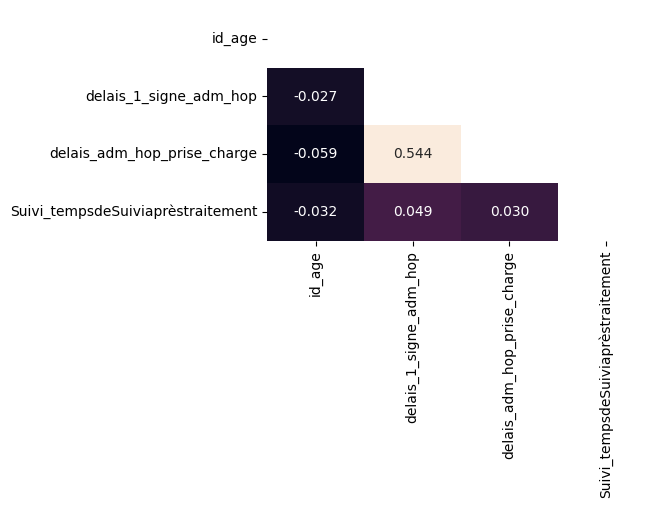

In [395]:
#matrice de corrélation 
numCols= ['id_age', 'delais_1_signe_adm_hop', 'delais_adm_hop_prise_charge', 'Suivi_tempsdeSuiviaprèstraitement']

mask = np.triu(np.ones_like(data[numCols].corr()) , k = 0)
plt.figure(figsize = (5,3))
sns.heatmap(data = data[numCols].corr() , annot = True, fmt = ".3f", 
            cbar = False, mask = mask) ;

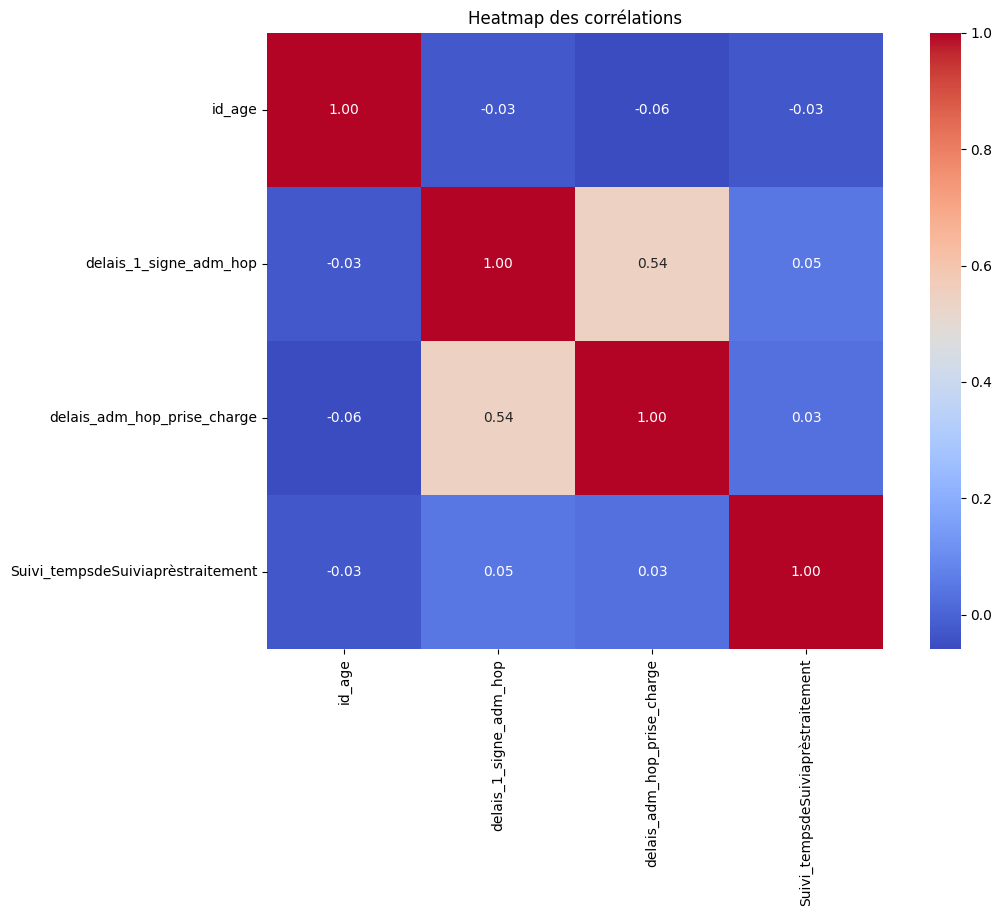

In [396]:
# Sélectionner uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=[np.number])

# Calculer et afficher la heatmap des corrélations
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap des corrélations")
plt.show()



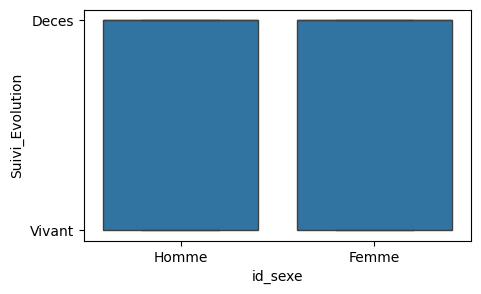

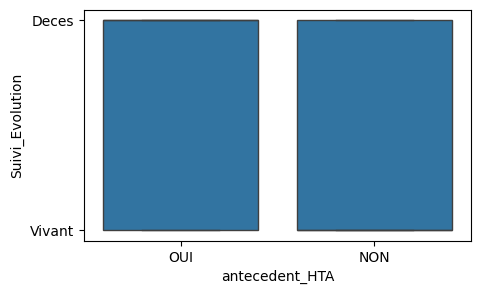

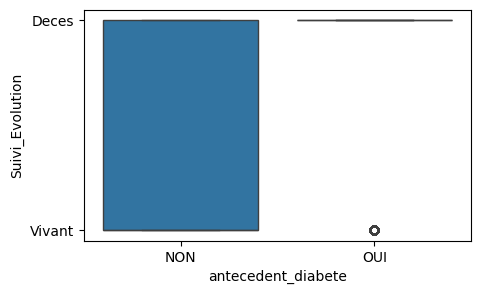

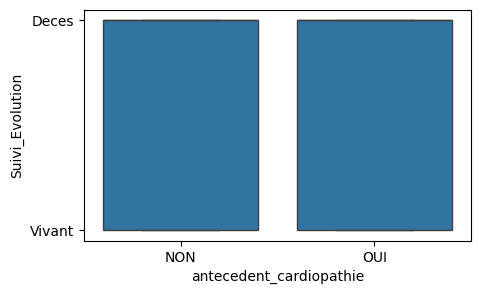

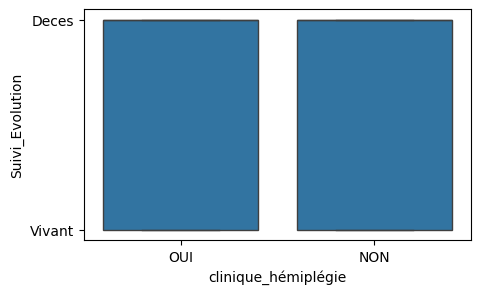

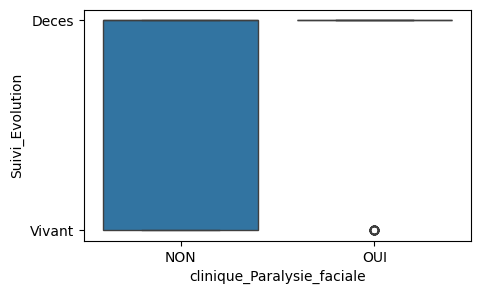

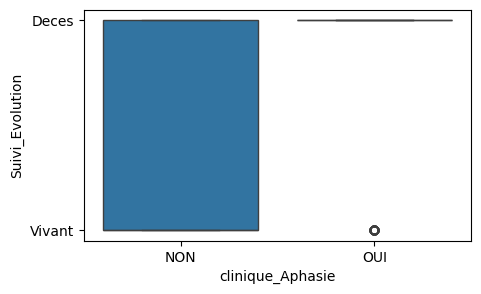

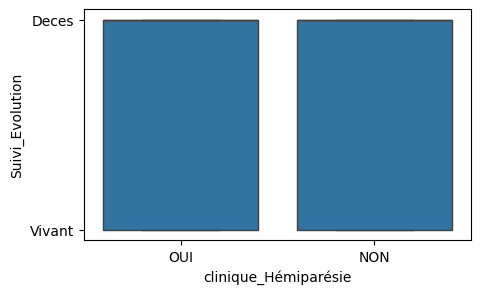

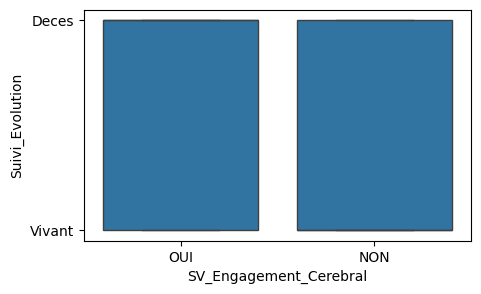

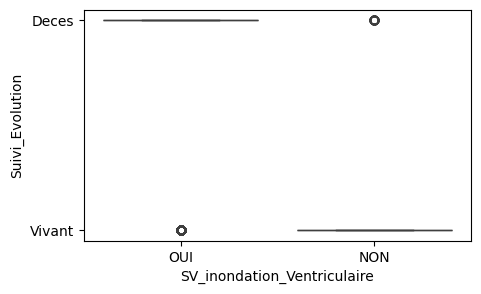

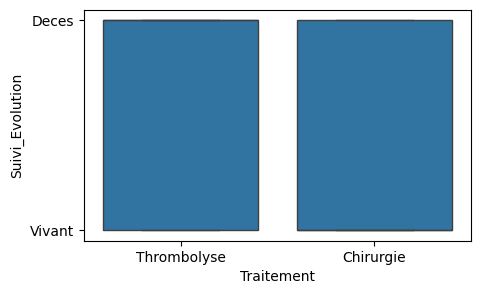

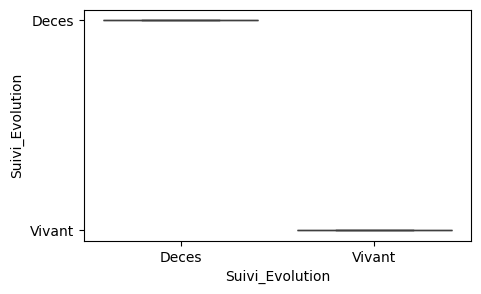

In [397]:
for var in data.select_dtypes('object') : 
    plt.figure(figsize = (5 , 3))
    sns.boxplot(data = data , x = var , y = "Suivi_Evolution")
    plt.show()

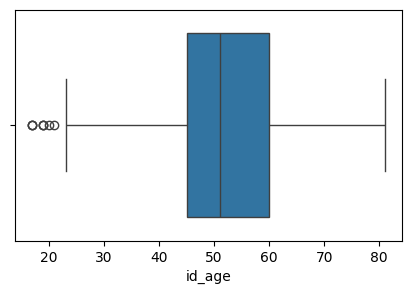

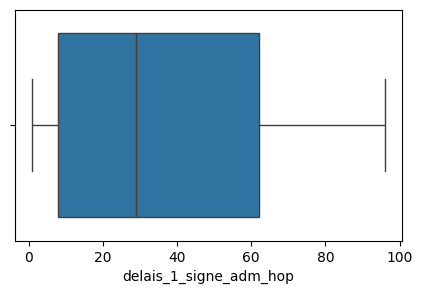

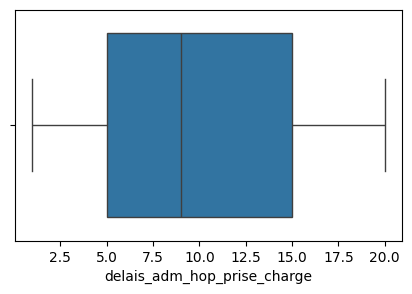

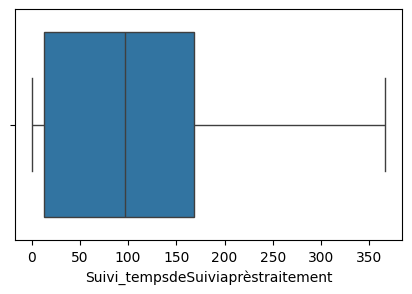

In [398]:
# vérification des outliers
for var in numCols : 
    plt.figure(figsize = (5 , 3))
    sns.boxplot(data = data , x = var)
    plt.show()

In [399]:
def encode(x): return 1 if x == 'Deces' else 0
data['enc_Suivi_Evolution'] = data.Suivi_Evolution.apply(encode)


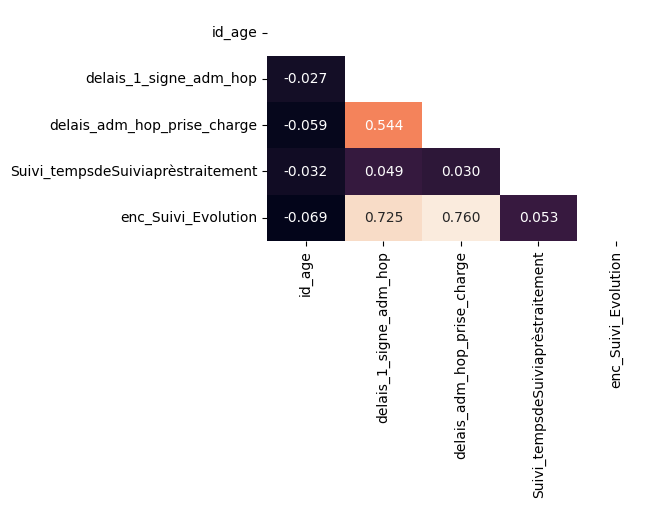

In [400]:
#matrice de corrélation 
numCols= ['id_age', 'delais_1_signe_adm_hop', 'delais_adm_hop_prise_charge', 'Suivi_tempsdeSuiviaprèstraitement','enc_Suivi_Evolution']

mask = np.triu(np.ones_like(data[numCols].corr()) , k = 0)
plt.figure(figsize = (5,3))
sns.heatmap(data = data[numCols].corr() , annot = True, fmt = ".3f", 
            cbar = False, mask = mask) ;

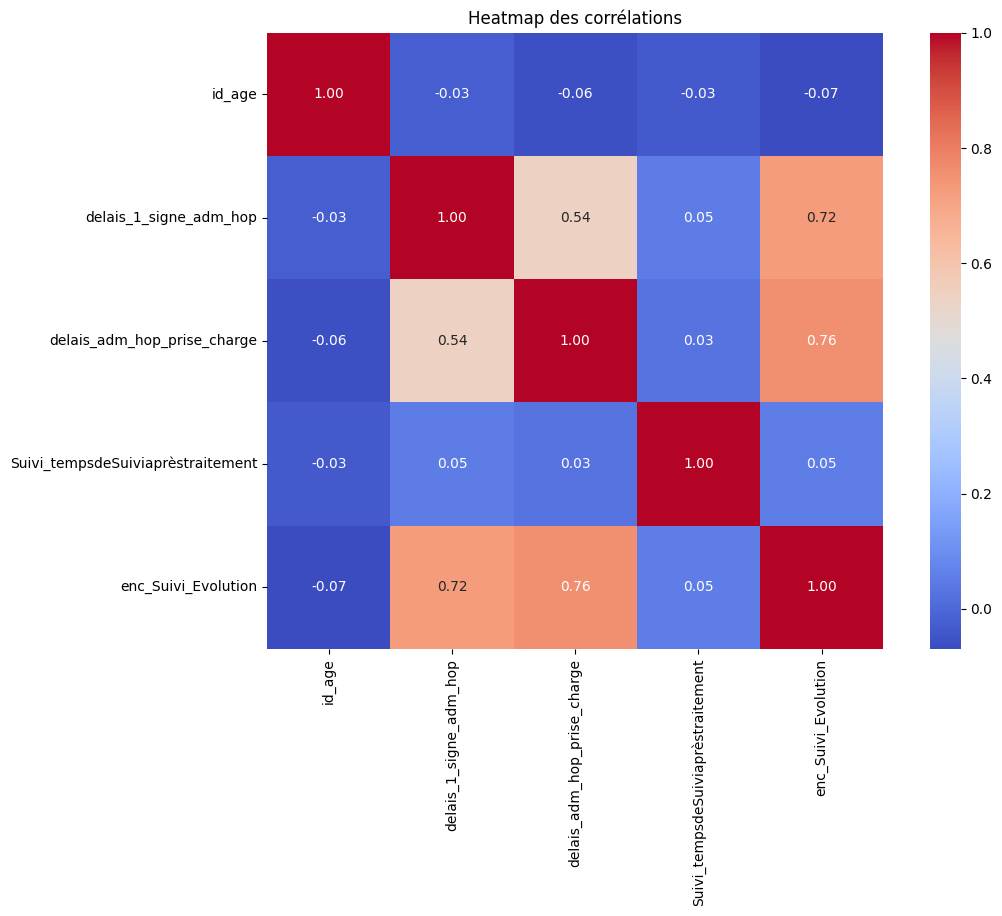

In [401]:
# Sélectionner uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=[np.number])


# Calculer et afficher la heatmap des corrélations
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap des corrélations")
plt.show()

In [402]:
# suppression des variables jugées inutiles
data = data.drop(['id_age'] , axis = 1)
#apperçu de la 
data.head()

id_sexe  delais_1_signe_adm_hop  delais_adm_hop_prise_charge antecedent_HTA  \
0   Homme                      23                            5            OUI   
1   Homme                      41                           12            OUI   
2   Homme                      28                           19            OUI   
3   Homme                      17                           15            OUI   
4   Homme                      17                            6            NON   

  antecedent_diabete antecedent_cardiopathie clinique_hémiplégie  \
0                NON                     NON                 OUI   
1                OUI                     NON                 OUI   
2                NON                     NON                 OUI   
3                OUI                     NON                 OUI   
4                NON                     NON                 OUI   

  clinique_Paralysie_faciale clinique_Aphasie clinique_Hémiparésie  \
0                        NON              NON                  OUI   
1                        OUI              OUI                  OUI   
2                        OUI              OUI                  OUI   
3                        OUI              NON                  OUI   
4                        OUI              OUI                  OUI   

  SV_Engagement_Cerebral SV_inondation_Ventriculaire   Traitement  \
0                    OUI                         OUI  Thrombolyse   
1                    OUI                         OUI    Chirurgie   
2                    OUI                         OUI  Thrombolyse   
3                    NON                         OUI    Chirurgie   
4                    OUI                         OUI  Thrombolyse   

   Suivi_tempsdeSuiviaprèstraitement Suivi_Evolution  enc_Suivi_Evolution  
0                                 79           Deces                    1  
1                                 34           Deces                    1  
2                                 64           Deces                    1  
3                                 62           Deces                    1  
4                                 12           Deces                    1

In [403]:
data.head()

id_sexe  delais_1_signe_adm_hop  delais_adm_hop_prise_charge antecedent_HTA  \
0   Homme                      23                            5            OUI   
1   Homme                      41                           12            OUI   
2   Homme                      28                           19            OUI   
3   Homme                      17                           15            OUI   
4   Homme                      17                            6            NON   

  antecedent_diabete antecedent_cardiopathie clinique_hémiplégie  \
0                NON                     NON                 OUI   
1                OUI                     NON                 OUI   
2                NON                     NON                 OUI   
3                OUI                     NON                 OUI   
4                NON                     NON                 OUI   

  clinique_Paralysie_faciale clinique_Aphasie clinique_Hémiparésie  \
0                        NON              NON                  OUI   
1                        OUI              OUI                  OUI   
2                        OUI              OUI                  OUI   
3                        OUI              NON                  OUI   
4                        OUI              OUI                  OUI   

  SV_Engagement_Cerebral SV_inondation_Ventriculaire   Traitement  \
0                    OUI                         OUI  Thrombolyse   
1                    OUI                         OUI    Chirurgie   
2                    OUI                         OUI  Thrombolyse   
3                    NON                         OUI    Chirurgie   
4                    OUI                         OUI  Thrombolyse   

   Suivi_tempsdeSuiviaprèstraitement Suivi_Evolution  enc_Suivi_Evolution  
0                                 79           Deces                    1  
1                                 34           Deces                    1  
2                                 64           Deces                    1  
3                                 62           Deces                    1  
4                                 12           Deces                    1

In [404]:
def encode(x): return 1 if x == 'OUI' else 0
data['enc_antecedent_HTA'] = data.antecedent_HTA.apply(encode)
data['enc_antecedent_diabete'] = data.antecedent_diabete.apply(encode)
data['enc_antecedent_cardiopathie'] = data.antecedent_cardiopathie.apply(encode)
data['enc_clinique_hémiplégie'] = data.clinique_hémiplégie.apply(encode)
data['enc_clinique_Aphasie'] = data.clinique_Aphasie.apply(encode)
data['enc_clinique_Paralysie_faciale'] = data.clinique_Paralysie_faciale.apply(encode)
data['enc_clinique_Hémiparésie'] = data.clinique_Hémiparésie.apply(encode)
data['enc_SV_Engagement_Cerebral'] = data.SV_Engagement_Cerebral.apply(encode)
data['enc_SV_inondation_Ventriculaire'] = data.SV_inondation_Ventriculaire.apply(encode)

In [405]:
data.head()

id_sexe  delais_1_signe_adm_hop  delais_adm_hop_prise_charge antecedent_HTA  \
0   Homme                      23                            5            OUI   
1   Homme                      41                           12            OUI   
2   Homme                      28                           19            OUI   
3   Homme                      17                           15            OUI   
4   Homme                      17                            6            NON   

  antecedent_diabete antecedent_cardiopathie clinique_hémiplégie  \
0                NON                     NON                 OUI   
1                OUI                     NON                 OUI   
2                NON                     NON                 OUI   
3                OUI                     NON                 OUI   
4                NON                     NON                 OUI   

  clinique_Paralysie_faciale clinique_Aphasie clinique_Hémiparésie  ...  \
0                        NON              NON                  OUI  ...   
1                        OUI              OUI                  OUI  ...   
2                        OUI              OUI                  OUI  ...   
3                        OUI              NON                  OUI  ...   
4                        OUI              OUI                  OUI  ...   

  enc_Suivi_Evolution enc_antecedent_HTA enc_antecedent_diabete  \
0                   1                  1                      0   
1                   1                  1                      1   
2                   1                  1                      0   
3                   1                  1                      1   
4                   1                  0                      0   

   enc_antecedent_cardiopathie enc_clinique_hémiplégie  enc_clinique_Aphasie  \
0                            0                       1                     0   
1                            0                       1                     1   
2                            0                       1                     1   
3                            0                       1                     0   
4                            0                       1                     1   

   enc_clinique_Paralysie_faciale  enc_clinique_Hémiparésie  \
0                               0                         1   
1                               1                         1   
2                               1                         1   
3                               1                         1   
4                               1                         1   

   enc_SV_Engagement_Cerebral  enc_SV_inondation_Ventriculaire  
0                           1                                1  
1                           1                                1  
2                           1                                1  
3                           0                                1  
4                           1                                1  

[5 rows x 25 columns]

In [406]:
def encode(x): return 1 if x == 'Homme' else 0
data['enc_id_sexe'] = data.id_sexe.apply(encode)


In [407]:
data.head()

id_sexe  delais_1_signe_adm_hop  delais_adm_hop_prise_charge antecedent_HTA  \
0   Homme                      23                            5            OUI   
1   Homme                      41                           12            OUI   
2   Homme                      28                           19            OUI   
3   Homme                      17                           15            OUI   
4   Homme                      17                            6            NON   

  antecedent_diabete antecedent_cardiopathie clinique_hémiplégie  \
0                NON                     NON                 OUI   
1                OUI                     NON                 OUI   
2                NON                     NON                 OUI   
3                OUI                     NON                 OUI   
4                NON                     NON                 OUI   

  clinique_Paralysie_faciale clinique_Aphasie clinique_Hémiparésie  ...  \
0                        NON              NON                  OUI  ...   
1                        OUI              OUI                  OUI  ...   
2                        OUI              OUI                  OUI  ...   
3                        OUI              NON                  OUI  ...   
4                        OUI              OUI                  OUI  ...   

  enc_antecedent_HTA enc_antecedent_diabete enc_antecedent_cardiopathie  \
0                  1                      0                           0   
1                  1                      1                           0   
2                  1                      0                           0   
3                  1                      1                           0   
4                  0                      0                           0   

   enc_clinique_hémiplégie enc_clinique_Aphasie  \
0                        1                    0   
1                        1                    1   
2                        1                    1   
3                        1                    0   
4                        1                    1   

   enc_clinique_Paralysie_faciale  enc_clinique_Hémiparésie  \
0                               0                         1   
1                               1                         1   
2                               1                         1   
3                               1                         1   
4                               1                         1   

   enc_SV_Engagement_Cerebral  enc_SV_inondation_Ventriculaire  enc_id_sexe  
0                           1                                1            1  
1                           1                                1            1  
2                           1                                1            1  
3                           0                                1            1  
4                           1                                1            1  

[5 rows x 26 columns]

In [408]:
def encode(x): return 1 if x == 'Thrombolyse' else 2
data['enc_Traitement'] = data.Traitement.apply(encode)

In [409]:
data.head()

id_sexe  delais_1_signe_adm_hop  delais_adm_hop_prise_charge antecedent_HTA  \
0   Homme                      23                            5            OUI   
1   Homme                      41                           12            OUI   
2   Homme                      28                           19            OUI   
3   Homme                      17                           15            OUI   
4   Homme                      17                            6            NON   

  antecedent_diabete antecedent_cardiopathie clinique_hémiplégie  \
0                NON                     NON                 OUI   
1                OUI                     NON                 OUI   
2                NON                     NON                 OUI   
3                OUI                     NON                 OUI   
4                NON                     NON                 OUI   

  clinique_Paralysie_faciale clinique_Aphasie clinique_Hémiparésie  ...  \
0                        NON              NON                  OUI  ...   
1                        OUI              OUI                  OUI  ...   
2                        OUI              OUI                  OUI  ...   
3                        OUI              NON                  OUI  ...   
4                        OUI              OUI                  OUI  ...   

  enc_antecedent_diabete enc_antecedent_cardiopathie enc_clinique_hémiplégie  \
0                      0                           0                       1   
1                      1                           0                       1   
2                      0                           0                       1   
3                      1                           0                       1   
4                      0                           0                       1   

   enc_clinique_Aphasie enc_clinique_Paralysie_faciale  \
0                     0                              0   
1                     1                              1   
2                     1                              1   
3                     0                              1   
4                     1                              1   

   enc_clinique_Hémiparésie  enc_SV_Engagement_Cerebral  \
0                         1                           1   
1                         1                           1   
2                         1                           1   
3                         1                           0   
4                         1                           1   

   enc_SV_inondation_Ventriculaire  enc_id_sexe  enc_Traitement  
0                                1            1               1  
1                                1            1               2  
2                                1            1               1  
3                                1            1               2  
4                                1            1               1  

[5 rows x 27 columns]

In [273]:
data.drop(data.columns[[0, 3, 4, 5, 6, 7, 8, 9]], axis=1, inplace=True)

In [274]:
data.head()

delais_1_signe_adm_hop  delais_adm_hop_prise_charge SV_Engagement_Cerebral  \
0                      23                            5                    OUI   
1                      41                           12                    OUI   
2                      28                           19                    OUI   
3                      17                           15                    NON   
4                      17                            6                    OUI   

  SV_inondation_Ventriculaire   Traitement  Suivi_tempsdeSuiviaprèstraitement  \
0                         OUI  Thrombolyse                                 79   
1                         OUI    Chirurgie                                 34   
2                         OUI  Thrombolyse                                 64   
3                         OUI    Chirurgie                                 62   
4                         OUI  Thrombolyse                                 12   

  Suivi_Evolution  enc_Suivi_Evolution  enc_antecedent_HTA  \
0           Deces                    1                   1   
1           Deces                    1                   1   
2           Deces                    1                   1   
3           Deces                    1                   1   
4           Deces                    1                   0   

   enc_antecedent_diabete  enc_antecedent_cardiopathie  \
0                       0                            0   
1                       1                            0   
2                       0                            0   
3                       1                            0   
4                       0                            0   

   enc_clinique_hémiplégie  enc_clinique_Aphasie  \
0                        1                     0   
1                        1                     1   
2                        1                     1   
3                        1                     0   
4                        1                     1   

   enc_clinique_Paralysie_faciale  enc_clinique_Hémiparésie  \
0                               0                         1   
1                               1                         1   
2                               1                         1   
3                               1                         1   
4                               1                         1   

   enc_SV_Engagement_Cerebral  enc_SV_inondation_Ventriculaire  enc_id_sexe  \
0                           1                                1            1   
1                           1                                1            1   
2                           1                                1            1   
3                           0                                1            1   
4                           1                                1            1   

   enc_Traitement  
0               1  
1               2  
2               1  
3               2  
4               1

In [275]:
data.drop(data.columns[[2, 3, 4, 6]], axis=1, inplace=True)

In [276]:
data.head()

delais_1_signe_adm_hop  delais_adm_hop_prise_charge  \
0                      23                            5   
1                      41                           12   
2                      28                           19   
3                      17                           15   
4                      17                            6   

   Suivi_tempsdeSuiviaprèstraitement  enc_Suivi_Evolution  enc_antecedent_HTA  \
0                                 79                    1                   1   
1                                 34                    1                   1   
2                                 64                    1                   1   
3                                 62                    1                   1   
4                                 12                    1                   0   

   enc_antecedent_diabete  enc_antecedent_cardiopathie  \
0                       0                            0   
1                       1                            0   
2                       0                            0   
3                       1                            0   
4                       0                            0   

   enc_clinique_hémiplégie  enc_clinique_Aphasie  \
0                        1                     0   
1                        1                     1   
2                        1                     1   
3                        1                     0   
4                        1                     1   

   enc_clinique_Paralysie_faciale  enc_clinique_Hémiparésie  \
0                               0                         1   
1                               1                         1   
2                               1                         1   
3                               1                         1   
4                               1                         1   

   enc_SV_Engagement_Cerebral  enc_SV_inondation_Ventriculaire  enc_id_sexe  \
0                           1                                1            1   
1                           1                                1            1   
2                           1                                1            1   
3                           0                                1            1   
4                           1                                1            1   

   enc_Traitement  
0               1  
1               2  
2               1  
3               2  
4               1

In [277]:
data.dtypes

delais_1_signe_adm_hop               int64
delais_adm_hop_prise_charge          int64
Suivi_tempsdeSuiviaprèstraitement    int64
enc_Suivi_Evolution                  int64
enc_antecedent_HTA                   int64
enc_antecedent_diabete               int64
enc_antecedent_cardiopathie          int64
enc_clinique_hémiplégie              int64
enc_clinique_Aphasie                 int64
enc_clinique_Paralysie_faciale       int64
enc_clinique_Hémiparésie             int64
enc_SV_Engagement_Cerebral           int64
enc_SV_inondation_Ventriculaire      int64
enc_id_sexe                          int64
enc_Traitement                       int64
dtype: object

In [278]:
# Changer le type des colonnes en 'FLOAT'
data = data.astype('float')
# Afficher le type des colonnes
print(data.dtypes)

delais_1_signe_adm_hop               float64
delais_adm_hop_prise_charge          float64
Suivi_tempsdeSuiviaprèstraitement    float64
enc_Suivi_Evolution                  float64
enc_antecedent_HTA                   float64
enc_antecedent_diabete               float64
enc_antecedent_cardiopathie          float64
enc_clinique_hémiplégie              float64
enc_clinique_Aphasie                 float64
enc_clinique_Paralysie_faciale       float64
enc_clinique_Hémiparésie             float64
enc_SV_Engagement_Cerebral           float64
enc_SV_inondation_Ventriculaire      float64
enc_id_sexe                          float64
enc_Traitement                       float64
dtype: object


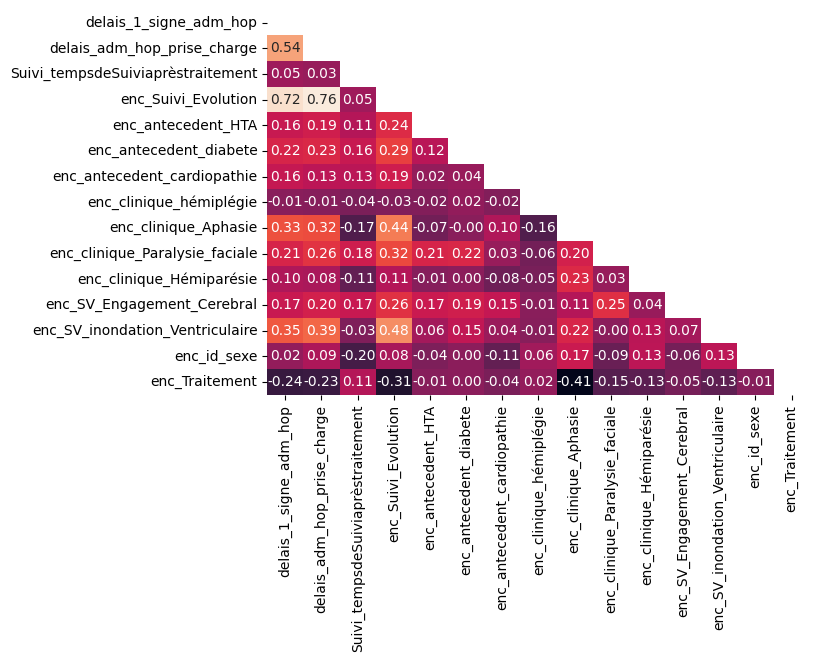

In [279]:
#matrice de corrélation 
mask = np.triu(np.ones_like(data.corr()) , k = 0)
plt.figure(figsize = (7,5))
sns.heatmap(data = data.corr() , annot = True, fmt = ".2f", 
            cbar = False, mask = mask) ;

In [280]:
data

delais_1_signe_adm_hop  delais_adm_hop_prise_charge  \
0                       23.0                          5.0   
1                       41.0                         12.0   
2                       28.0                         19.0   
3                       17.0                         15.0   
4                       17.0                          6.0   
...                      ...                          ...   
1048                    52.0                          6.0   
1049                    32.0                         15.0   
1050                    64.0                         12.0   
1051                    88.0                         16.0   
1052                    62.0                         12.0   

      Suivi_tempsdeSuiviaprèstraitement  enc_Suivi_Evolution  \
0                                  79.0                  1.0   
1                                  34.0                  1.0   
2                                  64.0                  1.0   
3                                  62.0                  1.0   
4                                  12.0                  1.0   
...                                 ...                  ...   
1048                              228.0                  1.0   
1049                              258.0                  1.0   
1050                              261.0                  1.0   
1051                              231.0                  1.0   
1052                                1.0                  1.0   

      enc_antecedent_HTA  enc_antecedent_diabete  enc_antecedent_cardiopathie  \
0                    1.0                     0.0                          0.0   
1                    1.0                     1.0                          0.0   
2                    1.0                     0.0                          0.0   
3                    1.0                     1.0                          0.0   
4                    0.0                     0.0                          0.0   
...                  ...                     ...                          ...   
1048                 1.0                     1.0                          1.0   
1049                 0.0                     0.0                          0.0   
1050                 1.0                     1.0                          0.0   
1051                 0.0                     0.0                          1.0   
1052                 0.0                     0.0                          0.0   

      enc_clinique_hémiplégie  enc_clinique_Aphasie  \
0                         1.0                   0.0   
1                         1.0                   1.0   
2                         1.0                   1.0   
3                         1.0                   0.0   
4                         1.0                   1.0   
...                       ...                   ...   
1048                      0.0                   1.0   
1049                      1.0                   1.0   
1050                      1.0                   1.0   
1051                      0.0                   1.0   
1052                      1.0                   1.0   

      enc_clinique_Paralysie_faciale  enc_clinique_Hémiparésie  \
0                                0.0                       1.0   
1                                1.0                       1.0   
2                                1.0                       1.0   
3                                1.0                       1.0   
4                                1.0                       1.0   
...                              ...                       ...   
1048                             1.0                       1.0   
1049                             1.0                       1.0   
1050                             1.0                       1.0   
1051                             1.0                       1.0   
1052                             1.0                       1.0   

      enc_SV_Engagement_Cerebral  enc_SV_inondation_Ventriculaire  \
0       

In [283]:
df=data.copy()

# **ANALYSE DE SURVIE**

# **KAPLAN MEIER**

In [397]:
kmf = KaplanMeierFitter()

In [398]:
kmf.fit(data['Suivi_tempsdeSuiviaprèstraitement'], data['enc_Suivi_Evolution'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1053 total observations, 361 right-censored observations>

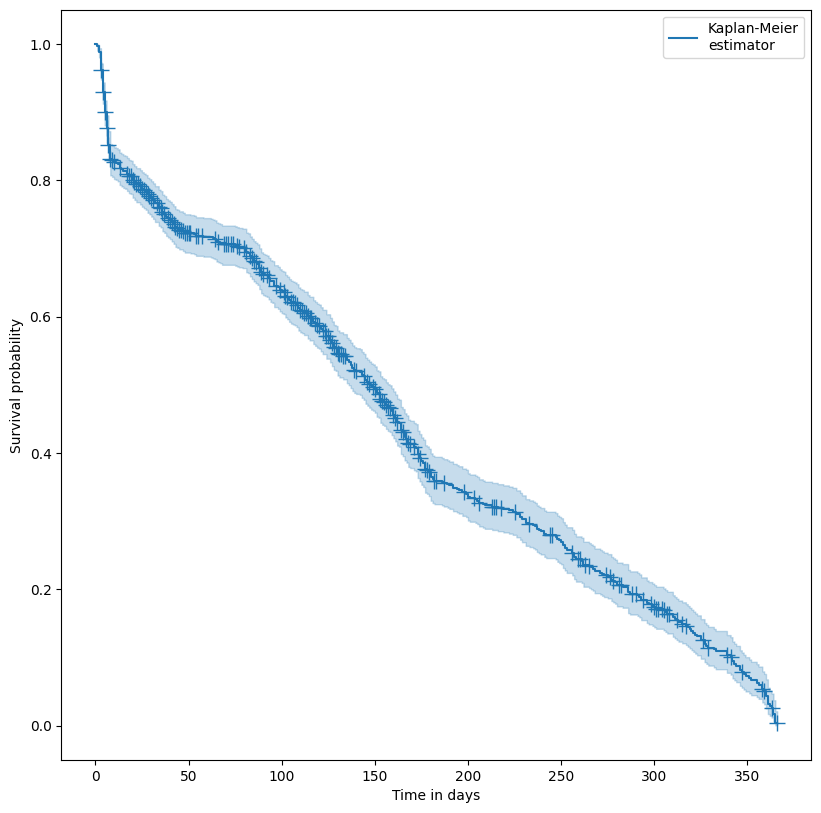

In [399]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.15, 0.15, 0.75, 0.75])
kmf.plot(ax=ax, ci_show=True, show_censors=True, label='Kaplan-Meier\nestimator')
ax.set_ylabel('Survival probability')
ax.set_xlabel('Time in days')
ax.set_ylim([-0.05, 1.05])
plt.show()

In [400]:
# Fonction d'aide pour tracer des courbes de Kaplan-Meier au niveau des covariables
def plot_km(col):
  ax = plt.subplot(111)
  for r in data[col].unique():
    ix = data[col] == r
    kmf.fit(data['Suivi_tempsdeSuiviaprèstraitement'][ix], data['enc_Suivi_Evolution'][ix],label=r)
    kmf.plot(ax=ax)

# Helper function for printing out Log-rank test results
def print_logrank(col):
  log_rank = pairwise_logrank_test(data['Suivi_tempsdeSuiviaprèstraitement'], data[col], data['enc_Suivi_Evolution'])
  return log_rank.summary

test_statistic         p  -log2(p)
1.0  2.0     0.000000e+00  1.000000 -0.000000
     3.0     0.000000e+00  1.000000 -0.000000
     4.0     0.000000e+00  1.000000 -0.000000
     5.0     0.000000e+00  1.000000 -0.000000
     6.0     0.000000e+00  1.000000 -0.000000
...                   ...       ...       ...
93.0 95.0    9.905587e-03  0.920720  0.119166
     96.0    5.536828e-07  0.999406  0.000857
94.0 95.0    3.110462e+00  0.077791  3.684255
     96.0    3.649588e-01  0.545765  0.873648
95.0 96.0    6.320327e-02  0.801503  0.319220

[4465 rows x 3 columns]

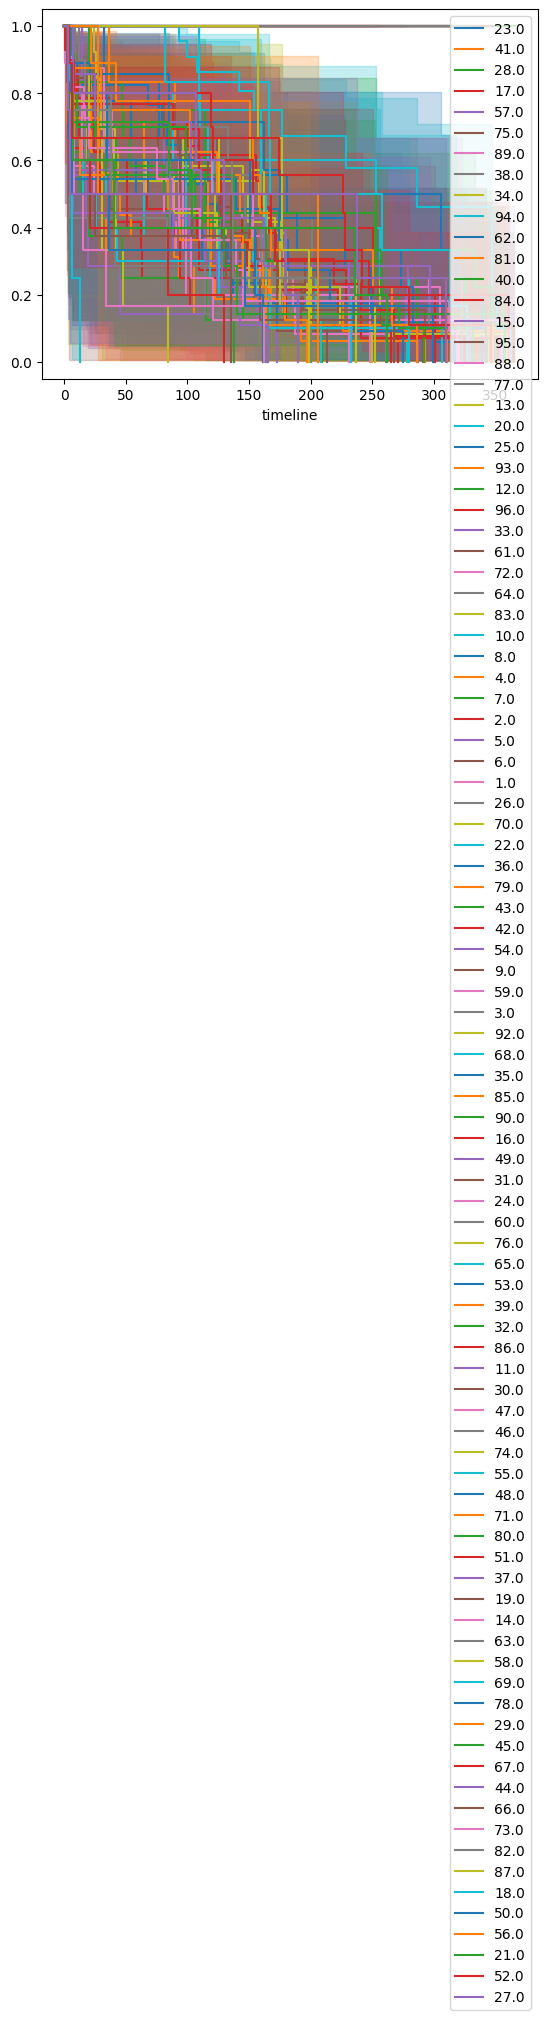

In [402]:
plot_km('delais_1_signe_adm_hop')
print_logrank('delais_1_signe_adm_hop')

test_statistic             p   -log2(p)
1.0  2.0         0.000000  1.000000e+00  -0.000000
     3.0         0.000000  1.000000e+00  -0.000000
     4.0         0.000000  1.000000e+00  -0.000000
     5.0        27.584465  1.503817e-07  22.664867
     6.0        37.665257  8.398720e-10  30.149111
...                   ...           ...        ...
17.0 19.0        1.030247  3.101005e-01   1.689192
     20.0        1.350797  2.451389e-01   2.028329
18.0 19.0        2.960911  8.529985e-02   3.551313
     20.0        2.502949  1.136333e-01   3.137542
19.0 20.0        0.168406  6.815322e-01   0.553146

[190 rows x 3 columns]

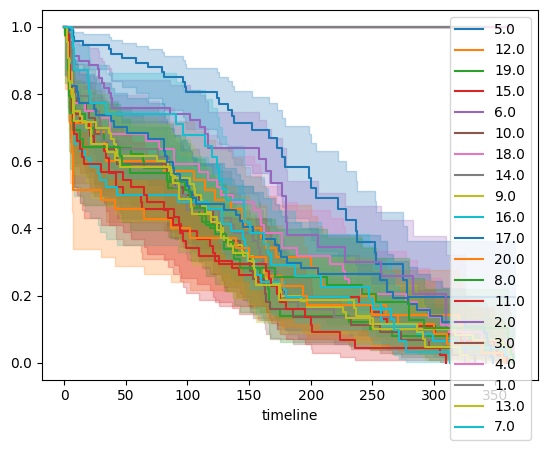

In [403]:

plot_km('delais_adm_hop_prise_charge')
print_logrank('delais_adm_hop_prise_charge')

test_statistic         p  -log2(p)
0.0 1.0        2.192751  0.138661  2.850361

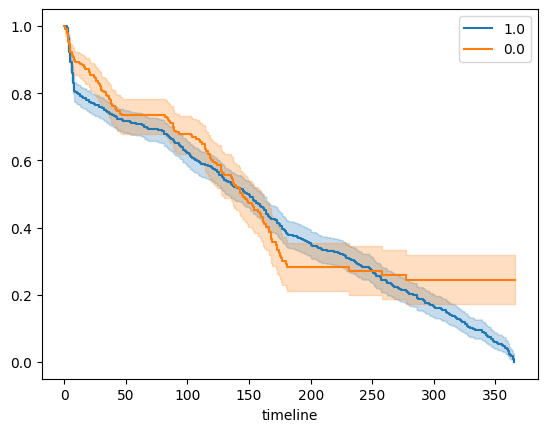

In [404]:
plot_km('enc_antecedent_HTA')
print_logrank('enc_antecedent_HTA')

test_statistic         p  -log2(p)
0.0 1.0        2.239285  0.134543  2.893859

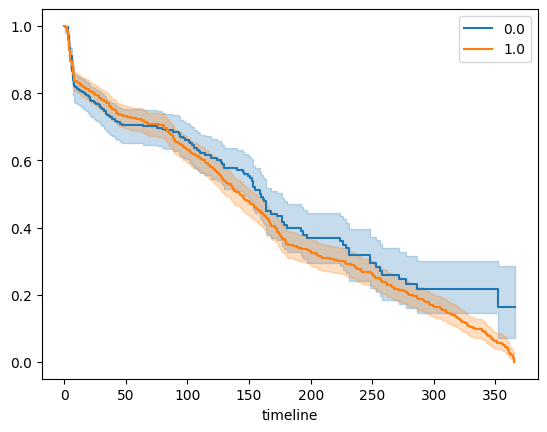

In [405]:
plot_km('enc_antecedent_diabete')
print_logrank('enc_antecedent_diabete')

test_statistic         p  -log2(p)
0.0 1.0        0.354526  0.551562  0.858405

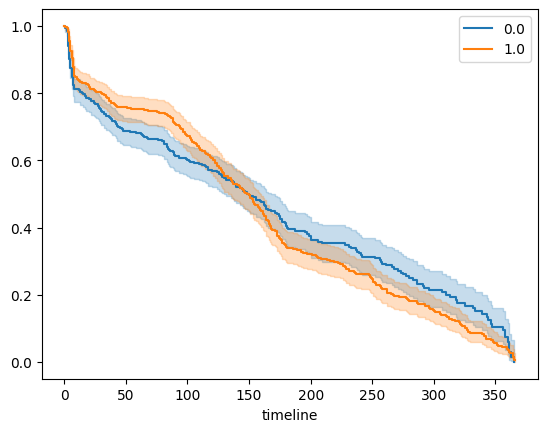

In [406]:
plot_km('enc_antecedent_cardiopathie')
print_logrank('enc_antecedent_cardiopathie')

test_statistic         p  -log2(p)
0.0 1.0        0.960322  0.327106  1.612171

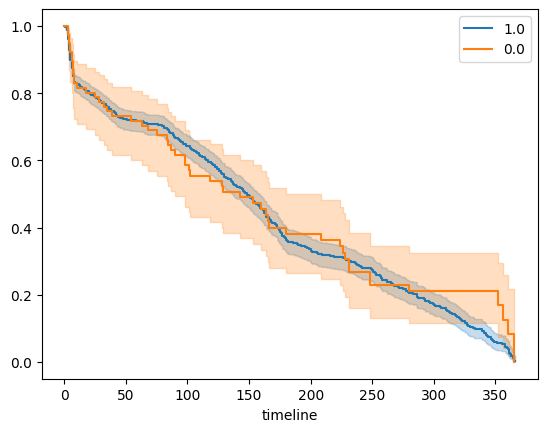

In [407]:
plot_km('enc_clinique_hémiplégie')
print_logrank('enc_clinique_hémiplégie')

test_statistic             p    -log2(p)
0.0 1.0      199.807373  2.300740e-45  148.284666

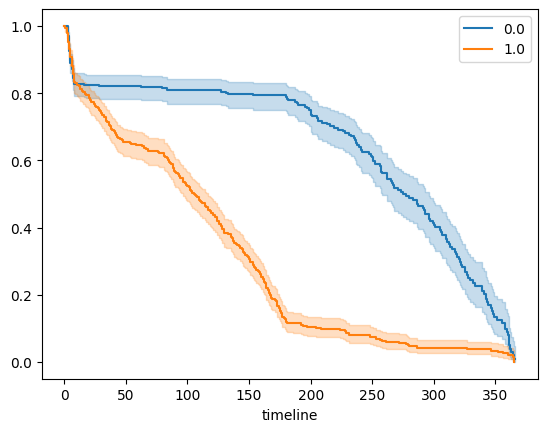

In [408]:
plot_km('enc_clinique_Aphasie')
print_logrank('enc_clinique_Aphasie')

test_statistic         p  -log2(p)
0.0 1.0        1.149179  0.283721  1.817455

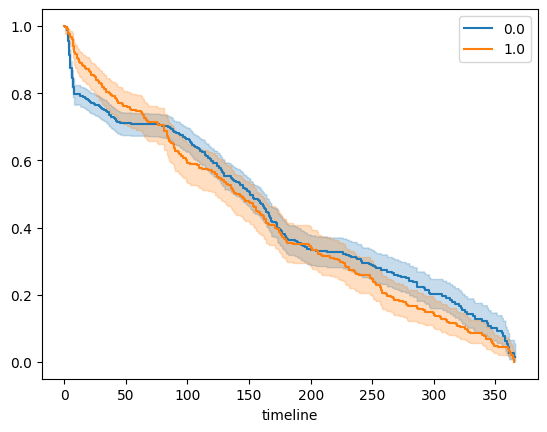

In [409]:
plot_km('enc_clinique_Paralysie_faciale')
print_logrank('enc_clinique_Paralysie_faciale')

test_statistic             p   -log2(p)
0.0 1.0       30.209773  3.877506e-08  24.620296

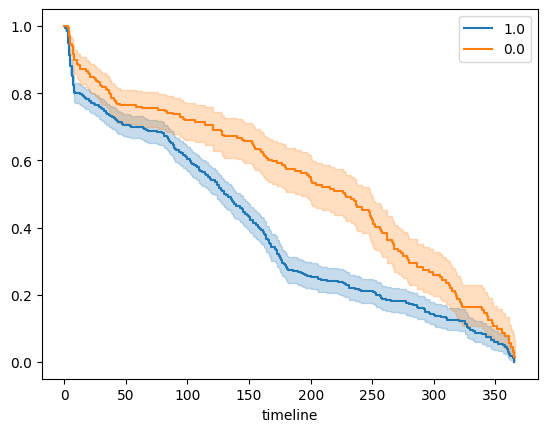

In [410]:
plot_km('enc_clinique_Hémiparésie')
print_logrank('enc_clinique_Hémiparésie')

test_statistic         p  -log2(p)
0.0 1.0        2.398146  0.121479   3.04122

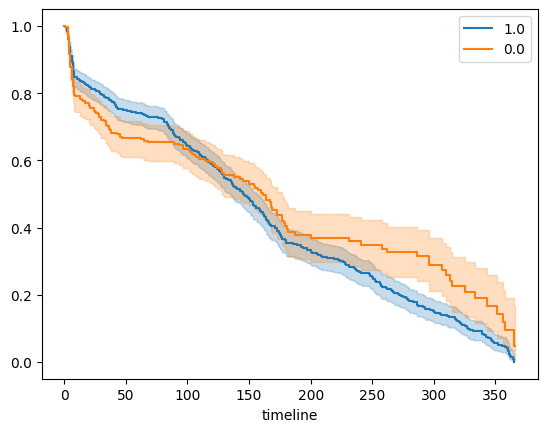

In [411]:
plot_km('enc_SV_Engagement_Cerebral')
print_logrank('enc_SV_Engagement_Cerebral')

test_statistic             p   -log2(p)
0.0 1.0       95.919984  1.196218e-22  72.823938

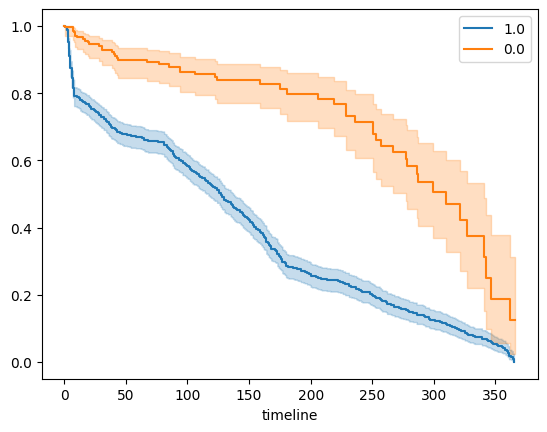

In [412]:
plot_km('enc_SV_inondation_Ventriculaire')
print_logrank('enc_SV_inondation_Ventriculaire')

test_statistic             p   -log2(p)
1.0 2.0       68.147289  1.517279e-16  52.549363

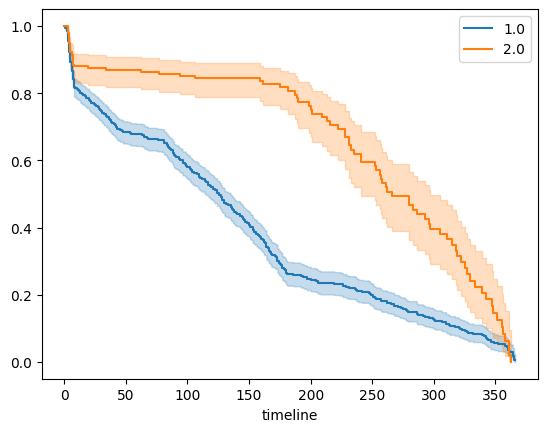

In [413]:
plot_km('enc_Traitement')
print_logrank('enc_Traitement')

test_statistic             p   -log2(p)
0.0 1.0       36.729204  1.357308e-09  29.456605

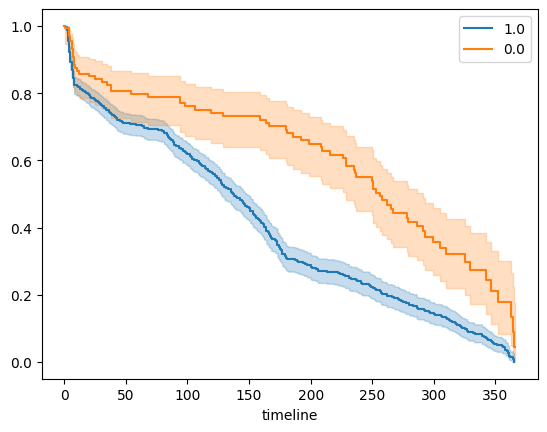

In [414]:
plot_km('enc_id_sexe')
print_logrank('enc_id_sexe')

# **MODELE DE COX**

In [415]:
# Suppression des colonnes spécifiées
data = data.drop(
    ['enc_SV_Engagement_Cerebral', 
     'enc_clinique_hémiplégie', 'enc_antecedent_cardiopathie', 
     'enc_antecedent_diabete', 'enc_antecedent_HTA',
     'enc_clinique_Paralysie_faciale'], 
    axis=1
)

In [416]:
cph = CoxPHFitter(alpha=0.05)

In [417]:
cph.fit(data, 'Suivi_tempsdeSuiviaprèstraitement', 'enc_Suivi_Evolution')

<lifelines.CoxPHFitter: fitted with 1053 total observations, 361 right-censored observations>

In [418]:
cph . print_summary ( )

<lifelines.CoxPHFitter: fitted with 1053 total observations, 361 right-censored observations>
             duration col = 'Suivi_tempsdeSuiviaprèstraitement'
                event col = 'enc_Suivi_Evolution'
      baseline estimation = breslow
   number of observations = 1053
number of events observed = 692
   partial log-likelihood = -3892.82
         time fit was run = 2024-12-18 16:03:04 UTC

---
                                 coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                        
delais_1_signe_adm_hop           0.01      1.01      0.00            0.00            0.01                1.00                1.01
delais_adm_hop_prise_charge      0.05      1.05      0.01            0.04            0.07                1.04                1.07
enc_clinique_Aphasie             0.76      2.14      0.10            0.57            0.95                1.76                2.60
enc_clinique_Hémiparésie         0.22      1.24      0.09            0.03            0.40                1.03                1.49
enc_SV_inondation_Ventriculaire  0.68      1.98      0.15            0.39            0.98                1.47                2.67
enc_id_sexe                      0.36      1.44      0.13            0.11            0.61                1.12                1.85
enc_Traitement                  -0.46      0.63      0.12           -0.70           -0.22                0.50                0.80

                                 cmp to     z      p  -log2(p)
covariate                                                     
delais_1_signe_adm_hop             0.00  4.95 <0.005     20.36
delais_adm_hop_prise_charge        0.00  6.55 <0.005     34.04
enc_clinique_Aphasie               0.00  7.72 <0.005     46.23
enc_clinique_Hémiparésie           0.00  2.33   0.02      5.65
enc_SV_inondation_Ventriculaire    0.00  4.51 <0.005     17.23
enc_id_sexe                        0.00  2.82 <0.005      7.72
enc_Traitement                     0.00 -3.79 <0.005     12.72
---
Concordance = 0.70
Partial AIC = 7799.64
log-likelihood ratio test = 413.85 on 7 df
-log2(p) of ll-ratio test = 281.02

<Axes: xlabel='HR (95% CI)'>

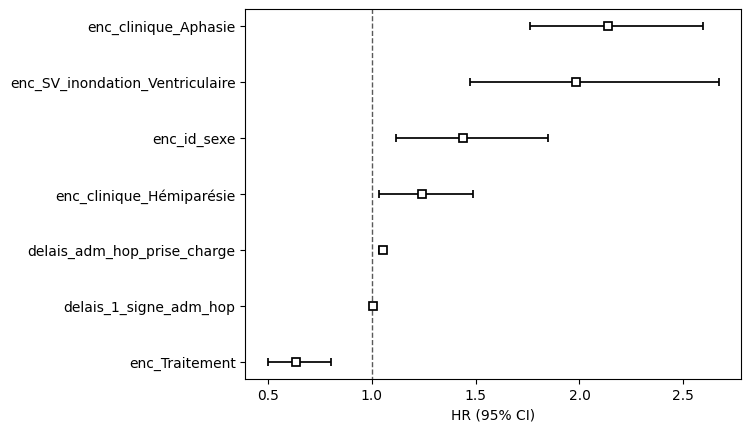

In [419]:
cph . plot ( hazard_ratios = True )

In [ ]:
cph . check_assumptions ( data , p_value_threshold = 0.05 , show_plots = True )


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...



In [ ]:
dir(cph)

In [284]:
df=data.copy()

# **MACHINE LERANING**

In [285]:
from sklearn.model_selection import train_test_split

y = data['enc_Suivi_Evolution']
X = data.drop(columns=['enc_Suivi_Evolution'],axis=1)

In [286]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)
#vérification 
print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test :", X_test.shape)
print("y_test :", y_test.shape)

X_train : (789, 14)
y_train : (789,)
X_test : (264, 14)
y_test : (264,)


# **Decision tree**

In [287]:
# Charger les librairies pour l'entrainement de l'arbre
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [288]:
# initialiser le modèle
import time
classifier = DecisionTreeClassifier(criterion='entropy')
debut = time.time()
# Entrainement du modèle
classifier = classifier.fit(X_train,y_train)
fin = time.time()

In [289]:
#prediction
y_pred = classifier.predict(X_test)

print('Accuracy score with decision tree:', metrics.accuracy_score(y_test,y_pred))
print("train_time", fin - debut, 'seconds')

Accuracy score with decision tree: 0.9962121212121212
train_time 0.005048274993896484 seconds


Précision moyenne avec validation croisée: 0.9915 ± 0.0082
Rapport de classification:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        80
         1.0       1.00      0.99      1.00       184

    accuracy                           1.00       264
   macro avg       0.99      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264

Score ROC-AUC: 0.9973


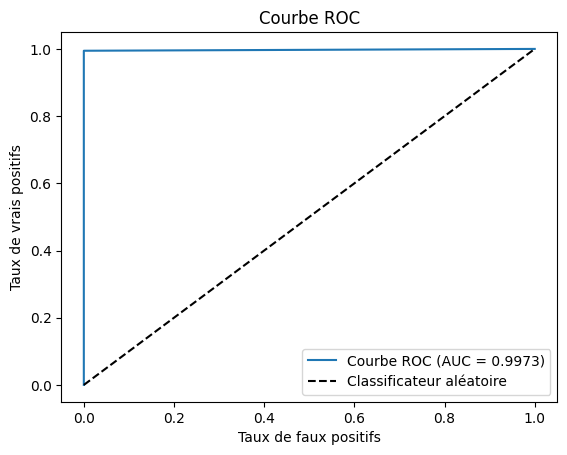

In [290]:
# Import des métriques supplémentaires
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Validation croisée
cv_scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
print(f"Précision moyenne avec validation croisée: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Prédictions et rapport de classification

print("Rapport de classification:")
print(classification_report(y_test, y_pred))

# Score ROC-AUC (si applicable)
if len(set(y)) == 2:  # Vérifie si la cible est binaire
    y_pred_prob = classifier.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"Score ROC-AUC: {auc:.4f}")

    # Tracer la courbe ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"Courbe ROC (AUC = {auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Classificateur aléatoire")
    plt.xlabel("Taux de faux positifs")
    plt.ylabel("Taux de vrais positifs")
    plt.title("Courbe ROC")
    plt.legend(loc="lower right")
    plt.show()


In [291]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[ 80,   0],
       [  1, 183]], dtype=int64)

In [292]:
#!pip install pydotplus
#!pip install six

**Interpretabilité**

In [293]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [294]:
data = data.drop(columns=['enc_Suivi_Evolution'])

In [295]:
data

delais_1_signe_adm_hop  delais_adm_hop_prise_charge  \
0                       23.0                          5.0   
1                       41.0                         12.0   
2                       28.0                         19.0   
3                       17.0                         15.0   
4                       17.0                          6.0   
...                      ...                          ...   
1048                    52.0                          6.0   
1049                    32.0                         15.0   
1050                    64.0                         12.0   
1051                    88.0                         16.0   
1052                    62.0                         12.0   

      Suivi_tempsdeSuiviaprèstraitement  enc_antecedent_HTA  \
0                                  79.0                 1.0   
1                                  34.0                 1.0   
2                                  64.0                 1.0   
3                                  62.0                 1.0   
4                                  12.0                 0.0   
...                                 ...                 ...   
1048                              228.0                 1.0   
1049                              258.0                 0.0   
1050                              261.0                 1.0   
1051                              231.0                 0.0   
1052                                1.0                 0.0   

      enc_antecedent_diabete  enc_antecedent_cardiopathie  \
0                        0.0                          0.0   
1                        1.0                          0.0   
2                        0.0                          0.0   
3                        1.0                          0.0   
4                        0.0                          0.0   
...                      ...                          ...   
1048                     1.0                          1.0   
1049                     0.0                          0.0   
1050                     1.0                          0.0   
1051                     0.0                          1.0   
1052                     0.0                          0.0   

      enc_clinique_hémiplégie  enc_clinique_Aphasie  \
0                         1.0                   0.0   
1                         1.0                   1.0   
2                         1.0                   1.0   
3                         1.0                   0.0   
4                         1.0                   1.0   
...                       ...                   ...   
1048                      0.0                   1.0   
1049                      1.0                   1.0   
1050                      1.0                   1.0   
1051                      0.0                   1.0   
1052                      1.0                   1.0   

      enc_clinique_Paralysie_faciale  enc_clinique_Hémiparésie  \
0                                0.0                       1.0   
1                                1.0                       1.0   
2                                1.0                       1.0   
3                                1.0                       1.0   
4                                1.0                       1.0   
...                              ...                       ...   
1048                             1.0                       1.0   
1049                             1.0                       1.0   
1050                             1.0                       1.0   
1051                             1.0                       1.0   
1052                             1.0                       1.0   

      enc_SV_Engagement_Cerebral  enc_SV_inondation_Ventriculaire  \
0                            1.0                              1.0   
1                            1.0                              1.0   
2                            1.0                              1.0   
3                            0.0                     

In [296]:
dot_data = StringIO()

In [297]:
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())
graph

In [298]:
forest_importances = pd.Series(classifier.feature_importances_,index=data.columns)
forest_importances

delais_1_signe_adm_hop               0.943276
delais_adm_hop_prise_charge          0.056724
Suivi_tempsdeSuiviaprèstraitement    0.000000
enc_antecedent_HTA                   0.000000
enc_antecedent_diabete               0.000000
enc_antecedent_cardiopathie          0.000000
enc_clinique_hémiplégie              0.000000
enc_clinique_Aphasie                 0.000000
enc_clinique_Paralysie_faciale       0.000000
enc_clinique_Hémiparésie             0.000000
enc_SV_Engagement_Cerebral           0.000000
enc_SV_inondation_Ventriculaire      0.000000
enc_id_sexe                          0.000000
enc_Traitement                       0.000000
dtype: float64

In [299]:
# Obtenir l'importance des variables
importance = classifier.feature_importances_

# Création d'un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': importance
})

# Tri des variables par ordre d'importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage de l'importance des variables
print(importance_df)

                             Variable  Importance
0              delais_1_signe_adm_hop    0.943276
1         delais_adm_hop_prise_charge    0.056724
2   Suivi_tempsdeSuiviaprèstraitement    0.000000
3                  enc_antecedent_HTA    0.000000
4              enc_antecedent_diabete    0.000000
5         enc_antecedent_cardiopathie    0.000000
6             enc_clinique_hémiplégie    0.000000
7                enc_clinique_Aphasie    0.000000
8      enc_clinique_Paralysie_faciale    0.000000
9            enc_clinique_Hémiparésie    0.000000
10         enc_SV_Engagement_Cerebral    0.000000
11    enc_SV_inondation_Ventriculaire    0.000000
12                        enc_id_sexe    0.000000
13                     enc_Traitement    0.000000


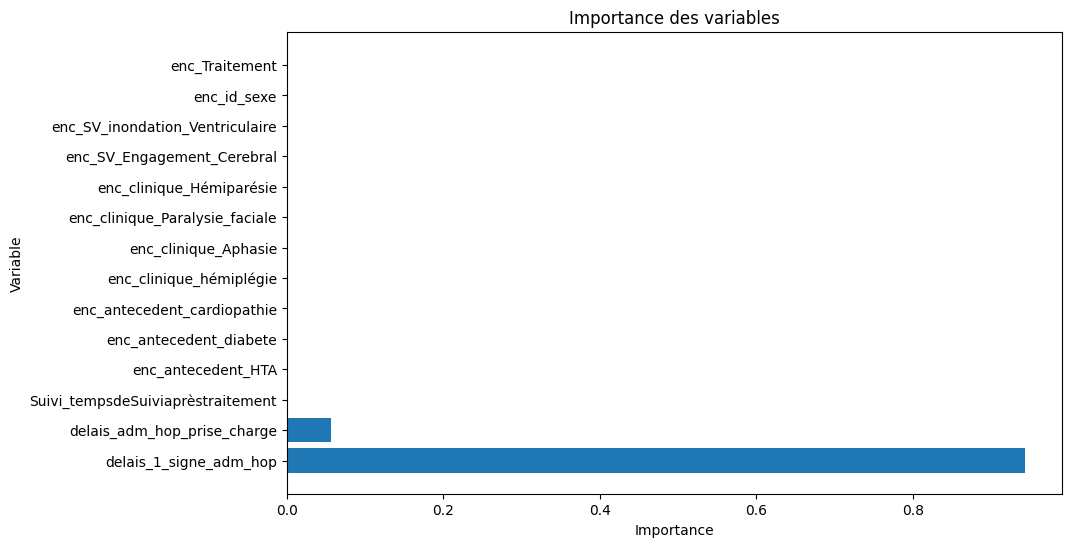

In [300]:
# Graphique de l'importance des variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables')
plt.show()

# **KNN(K Nearest Neighbor)**

In [301]:
from sklearn.neighbors import KNeighborsClassifier 

In [302]:
classifier_KNN = KNeighborsClassifier(n_neighbors=3)

In [303]:
debut = time.time()
classifier_KNN.fit(X_train, y_train)
fin = time.time()

In [304]:
y_pred = classifier_KNN.predict(X_test)
print(f'Accuracy score with KNN classifier: {metrics.accuracy_score(y_test,y_pred)}')
print("train_time", fin - debut, 'seconds')

Accuracy score with KNN classifier: 0.9810606060606061
train_time 0.008023977279663086 seconds


# **SVM(Support Vecteur Machine)**

In [305]:
from sklearn.svm import SVC

In [306]:
classifier = SVC(kernel = 'linear', random_state = 0)

In [307]:
debut = time.time()
classifier.fit(X_train, y_train)
fin = time.time()

In [308]:
y_pred_test = classifier.predict(X_test)
y_pred_train=classifier.predict(X_train)
print(f'Accuracy score with SVM classifier: {metrics.accuracy_score(y_test,y_pred_test)}')
print("train_time", fin - debut, 'seconds')

Accuracy score with SVM classifier: 0.9962121212121212
train_time 0.05248284339904785 seconds


In [309]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Calculer les mesures d'évaluation pour l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1_score = f1_score(y_train, y_pred_train)
train_auc = roc_auc_score(y_train, classifier.decision_function(X_train))


In [310]:
# Calculer les mesures d'évaluation pour l'ensemble de test
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test)
test_auc = roc_auc_score(y_test, classifier.decision_function(X_test))


In [311]:
# Créer un tableau avec les mesures d'évaluation
evaluation_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1_score, train_auc],
    'Test': [test_accuracy, test_precision, test_recall, test_f1_score, test_auc]
})

# Afficher le tableau des performances
print(evaluation_table)

    Métrique  Train      Test
0   Accuracy    1.0  0.996212
1  Precision    1.0  1.000000
2     Recall    1.0  0.994565
3   F1 Score    1.0  0.997275
4        AUC    1.0  0.999932


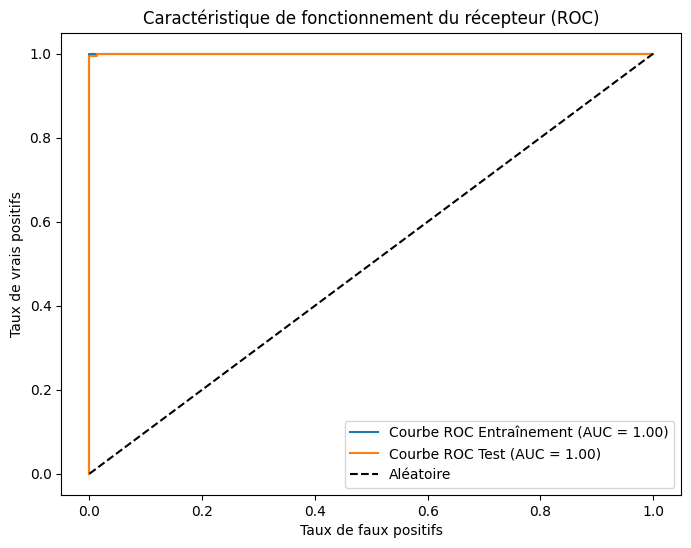

In [312]:
# Créer les courbes ROC pour les ensembles d'entraînement et de test
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, classifier.decision_function(X_train))
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, classifier.decision_function(X_test))

# Calculer les AUC pour les ensembles d'entraînement et de test
auc_train = roc_auc_score(y_train, classifier.decision_function(X_train))
auc_test = roc_auc_score(y_test, classifier.decision_function(X_test))

# Afficher les courbes ROC avec les valeurs d'AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Courbe ROC Entraînement (AUC = {:.2f})'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Courbe ROC Test (AUC = {:.2f})'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Caractéristique de fonctionnement du récepteur (ROC)')
plt.legend(loc='lower right')
plt.show()

## **ENSEMBLE LEARNING**

In [314]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
debut = time.time()
gb_model.fit(X_train, y_train)
fin = time.time()
preds_train = gb_model.predict(X_train)
preds_test = gb_model.predict(X_test)
import numpy as np

from sklearn.metrics import accuracy_score

# Conversion des probabilités en classes discrètes (seuil = 0.5)
preds_train_binary = (preds_train >= 0.5).astype(int)
preds_test_binary = (preds_test >= 0.5).astype(int)
train_time= fin - debut
# Calcul de la précision
accuracy_train = accuracy_score(y_train, preds_train_binary)
accuracy_test = accuracy_score(y_test, preds_test_binary)
# Affichage des résultats
performance_table = pd.DataFrame({
    'Métrique': ['Accuracy score', 'train_time' ],
    'Ensemble d\'entraînement': [accuracy_train, train_time],
    'Ensemble de test': [accuracy_test, train_time],
     
})
print(performance_table)
cm = confusion_matrix(y_test, y_pred)
print(cm)

         Métrique  Ensemble d'entraînement  Ensemble de test
0  Accuracy score                 1.000000          0.996212
1      train_time                 0.560777          0.560777
[[ 80   0]
 [  5 179]]


In [315]:
# Obtenir l'importance des variables
importance = gb_model.feature_importances_

# Création d'un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': importance
})

# Tri des variables par ordre d'importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage de l'importance des variables
print(importance_df)

                             Variable    Importance
0              delais_1_signe_adm_hop  9.675300e-01
1         delais_adm_hop_prise_charge  3.247003e-02
2   Suivi_tempsdeSuiviaprèstraitement  3.512098e-15
8      enc_clinique_Paralysie_faciale  3.675534e-17
5         enc_antecedent_cardiopathie  1.448373e-17
13                     enc_Traitement  4.734514e-18
3                  enc_antecedent_HTA  0.000000e+00
4              enc_antecedent_diabete  0.000000e+00
6             enc_clinique_hémiplégie  0.000000e+00
7                enc_clinique_Aphasie  0.000000e+00
9            enc_clinique_Hémiparésie  0.000000e+00
10         enc_SV_Engagement_Cerebral  0.000000e+00
11    enc_SV_inondation_Ventriculaire  0.000000e+00
12                        enc_id_sexe  0.000000e+00


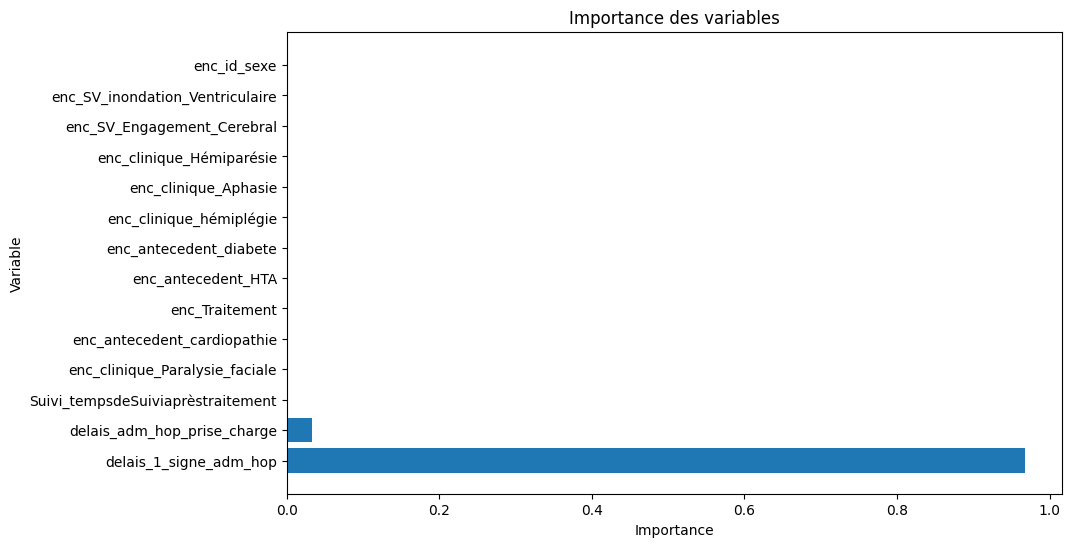

In [316]:
# Graphique de l'importance des variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables')
plt.show()

In [317]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score


# Créer un modèle de forêt aléatoire de régression
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
debut = time.time()
model.fit(X_train, y_train)
fin = time.time()

In [318]:
# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [319]:
# Calcul des métriques de performance
train_time= fin - debut

accuracy_train = accuracy_score(y_train, preds_train_binary)
accuracy_test = accuracy_score(y_test, preds_test_binary)

explained_var_train = explained_variance_score(y_train, y_train_pred)
explained_var_test = explained_variance_score(y_test, y_test_pred)

# Affichage des résultats
performance_table = pd.DataFrame({
    'Métrique': ['explained', 'Accuracy score', 'train_time'],
    'Ensemble d\'entraînement': [explained_var_train, accuracy_train, train_time],
    'Ensemble de test': [explained_var_test, accuracy_test, train_time],
})
print(performance_table)

         Métrique  Ensemble d'entraînement  Ensemble de test
0       explained                  1.00000          0.982133
1  Accuracy score                  1.00000          0.996212
2      train_time                  0.63087          0.630870


In [320]:
# Obtenir l'importance des variables
importance = model.feature_importances_

# Création d'un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': importance
})

# Tri des variables par ordre d'importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage de l'importance des variables
print(importance_df)

                             Variable  Importance
0              delais_1_signe_adm_hop    0.520295
1         delais_adm_hop_prise_charge    0.274637
11    enc_SV_inondation_Ventriculaire    0.067122
7                enc_clinique_Aphasie    0.044692
8      enc_clinique_Paralysie_faciale    0.018966
2   Suivi_tempsdeSuiviaprèstraitement    0.017855
13                     enc_Traitement    0.016087
4              enc_antecedent_diabete    0.011471
3                  enc_antecedent_HTA    0.011361
10         enc_SV_Engagement_Cerebral    0.005931
5         enc_antecedent_cardiopathie    0.005768
12                        enc_id_sexe    0.002372
9            enc_clinique_Hémiparésie    0.002100
6             enc_clinique_hémiplégie    0.001343


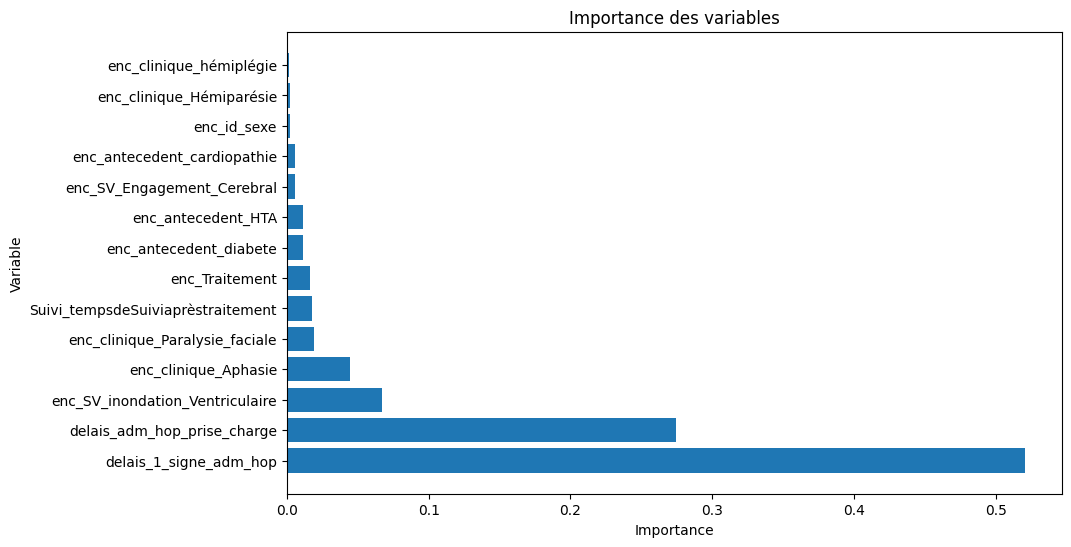

In [321]:
# Graphique de l'importance des variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables')
plt.show()

In [322]:
# Initialiser le modèle AdaBoost avec un classificateur de base (DecisionTree)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model = AdaBoostClassifier(
    estimator =DecisionTreeClassifier(max_depth=4),  # Arbre de décision comme régressseur de base
    n_estimators=100,  # Nombre de modèles faibles (itérations de boosting)
    random_state=42
)

# Entraîner le modèle
debut = time.time()
model.fit(X_train, y_train)
fin = time.time()
# Faire des prédictions
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
# Évaluer le modèle

accuracy_train = accuracy_score(y_train, x_pred)
accuracy_test = accuracy_score(y_test, y_pred)


print(f"accuracy_train : {accuracy_train}")
print(f"accuracy_test: {accuracy_test}")

print("train_time", fin - debut, 'seconds')

accuracy_train : 1.0
accuracy_test: 0.9962121212121212
train_time 0.010127067565917969 seconds


C:\Users\sokhn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [323]:
# Obtenir l'importance des variables
importance = model.feature_importances_

# Création d'un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': importance
})

# Tri des variables par ordre d'importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage de l'importance des variables
print(importance_df)

                             Variable  Importance
0              delais_1_signe_adm_hop     0.96753
1         delais_adm_hop_prise_charge     0.03247
2   Suivi_tempsdeSuiviaprèstraitement     0.00000
3                  enc_antecedent_HTA     0.00000
4              enc_antecedent_diabete     0.00000
5         enc_antecedent_cardiopathie     0.00000
6             enc_clinique_hémiplégie     0.00000
7                enc_clinique_Aphasie     0.00000
8      enc_clinique_Paralysie_faciale     0.00000
9            enc_clinique_Hémiparésie     0.00000
10         enc_SV_Engagement_Cerebral     0.00000
11    enc_SV_inondation_Ventriculaire     0.00000
12                        enc_id_sexe     0.00000
13                     enc_Traitement     0.00000


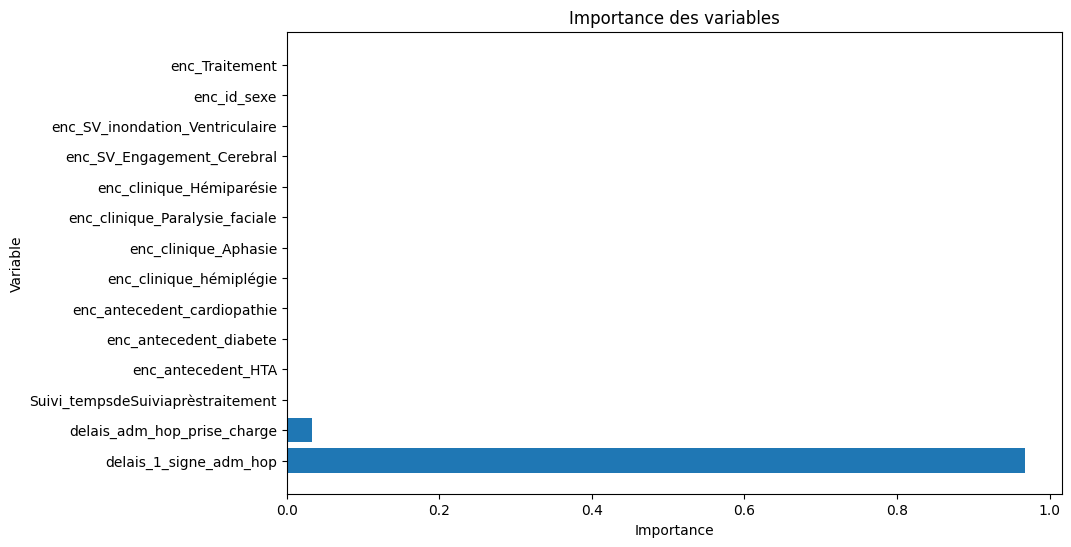

In [324]:
# Graphique de l'importance des variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables')
plt.show()

# **DEEP LEARNING (Perceptron Multicouche)**

In [325]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import log_loss
from sklearn import metrics
#import shap
#from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [326]:
X = df.drop('enc_Suivi_Evolution', axis=1)
y = df['enc_Suivi_Evolution']

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [328]:
from sklearn.metrics import accuracy_score
clf = MLPClassifier(hidden_layer_sizes=(10,20),activation="relu",random_state=3).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))

0.9841772151898734


C:\Users\sokhn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [329]:
print(clf.score(X_train, y_train))

0.9986431478968792


In [330]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Précision du modèle : à quelle fréquence le classificateur est-il correct ?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Précision du modèle : quel pourcentage de tuples positifs sont étiquetés comme tels ?
print("Precision:",metrics.precision_score(y_test, y_pred))

#Model Recall : quel pourcentage de tuples positifs sont étiquetés comme tels ?
print("Recall:",metrics.recall_score(y_test, y_pred))
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print(f'''Specificity: {specificity:.3f}''')

Accuracy: 0.9841772151898734
Precision: 0.9855072463768116
Recall: 0.9902912621359223
Specificity: 0.973


              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       110
         1.0       0.99      0.99      0.99       206

    accuracy                           0.98       316
   macro avg       0.98      0.98      0.98       316
weighted avg       0.98      0.98      0.98       316



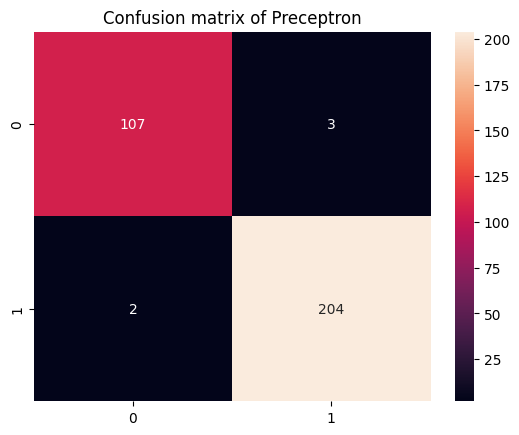

In [331]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
#cm = confusion_matrix(y_train, y_test)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of Preceptron') # fmt='d' formate les nombres sous forme de chiffres, ce qui signifie des nombres entiers

print(classification_report(y_test,y_pred))

In [332]:
auc = metrics.roc_auc_score(y_test,y_pred)
print(auc)

0.9815092674315976


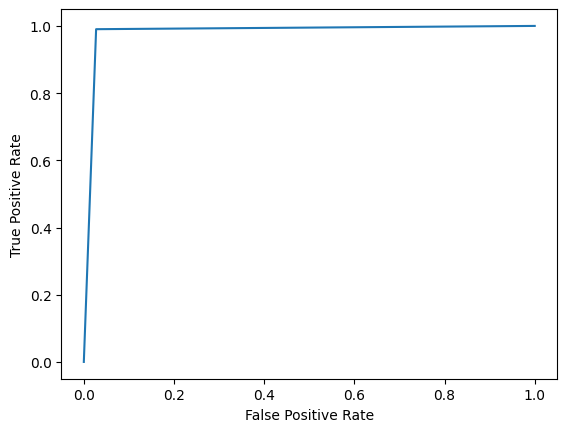

AUC : 0.9815092674315976


In [333]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(f'AUC : {metrics.roc_auc_score(y_test,y_pred)}')

# **Hyperparametre GridSearchCV**

In [334]:
# Importer les librairies
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [336]:
# Créer un ensemble contenant nos modèle et nos datasets
tab_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'KNeighbors' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,5,11],
            'p':[1,2,3],
            'weights':['uniform','distance']
        }
    },
    'MLPClassifier' : {
        'model': MLPClassifier(),
        'params': {
            'hidden_layer_sizes' : [(10,20),(10,20,10),(10,20,10,10)],
            'activation' : ['relu','logistic'],
            'random_state' : [1, 2, 3]
                  }
    },
    'AdaBoost': {
        'model' : AdaBoostClassifier(),
            'params': {
                'n_estimators': [1,5,11]
                      }  
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
            'params': {
                'n_estimators': [1,5,10]
                      }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['entropy']
                }
    }
}
                 
def test_model_param(params,X,y):
    scores = [] # On va stocker les différents score
    for model_name, mp in params.items():
        clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
        clf.fit(X, y)
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })
    return (pd.DataFrame(scores,columns=['model','best_score','best_params']))

In [337]:
#Testons notre fonction
test_model_param(tab_params,X,y)

C:\Users\sokhn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sokhn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sokhn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sokhn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

model  best_score  \
0               svm    0.999052   
1     random_forest    0.995256   
2        KNeighbors    0.979111   
3     MLPClassifier    0.997147   
4          AdaBoost    0.999052   
5  GradientBoosting    0.998100   
6      DecisionTree    0.992413   

                                         best_params  
0                       {'C': 1, 'kernel': 'linear'}  
1                                {'n_estimators': 5}  
2  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}  
3  {'activation': 'relu', 'hidden_layer_sizes': (...  
4                               {'n_estimators': 11}  
5                                {'n_estimators': 5}  
6                           {'criterion': 'entropy'}

# **Validation croisée Pipeline**

In [338]:
# @title Titre par défaut
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

In [339]:
scaler = StandardScaler()
random_state = 0
cross_validation = StratifiedKFold(n_splits=3, random_state=random_state, shuffle=True)

In [340]:
pipeline = Pipeline([('scaler', scaler), ('classifier', clf)])

accuracy = cross_val_score(pipeline, X, y, cv=cross_validation)
print(accuracy)
print('Mean test accuracy', '{:.3f}'.format(accuracy.mean()))

C:\Users\sokhn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.98860399 0.98575499 0.99145299]
Mean test accuracy 0.989


C:\Users\sokhn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [341]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) 
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [342]:
from sklearn.svm import SVC

svm_model = SVC(C=1, kernel='linear', gamma='auto')
svm_model.fit(X_train, y_train)


SVC(C=1, gamma='auto', kernel='linear')

In [343]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(n_estimators=11)
adaboost_model.fit(X_train, y_train)


C:\Users\sokhn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=11)

In [345]:
from sklearn.metrics import accuracy_score, classification_report

# SVM
svm_pred = svm_model.predict(X_valid)
print("SVM Accuracy:", accuracy_score(y_valid, svm_pred))
print("SVM Classification Report:\n", classification_report(y_valid, svm_pred))

# AdaBoost
adaboost_pred = adaboost_model.predict(X_valid)
print("AdaBoost Accuracy:", accuracy_score(y_valid, adaboost_pred))
print("AdaBoost Classification Report:\n", classification_report(y_valid, adaboost_pred))


SVM Accuracy: 1.0
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        77
         1.0       1.00      1.00      1.00       134

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

AdaBoost Accuracy: 1.0
AdaBoost Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        77
         1.0       1.00      1.00      1.00       134

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



In [352]:
best_model = adaboost_model 

test_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_pred))
print("Test Classification Report:\n", classification_report(y_test, test_pred))


Test Accuracy: 0.995260663507109
Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        68
         1.0       1.00      0.99      1.00       143

    accuracy                           1.00       211
   macro avg       0.99      1.00      0.99       211
weighted avg       1.00      1.00      1.00       211



In [353]:
#adaboost est le meilleir model

In [356]:
#sauvegarde du modele pour déploiement
import pickle
pickle.dump(best_model , open("modeladaboost.pkl" , "wb"))